### Set up the code

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#!pip install matplotlib #py -m

import pandas as pd
import numpy as np
import scipy.io
from scipy.optimize import curve_fit
from astropy.io import fits

#use %matplotlib notebook rather than %matplotlib inline
%matplotlib notebook

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import LogNorm
import matplotlib as mpl
cmap = mpl.colormaps['viridis'] #ds9cool
#from matplotlib.cm import register_cmap, cmap_d
import statsmodels.api as sm

#import statsmodels.formula.api as smf
#from statsmodels.graphics.gofplots import qqplot


#plt.style.use('ggplot')
font = {#'family' : 'normal',
        #'color' : 'white',
        #'weight' : 'bold',
        'size'   : 11}
plt.rc('font', **font)
# trash: path = '/content/drive/MyDrive/thesis_masters/2020-02-08_results/'
file2= 'ff_variable-table_properties.txt' # file2's contents are: (3, 3, 39, 200, 200)

g_drive_path = '/content/drive/MyDrive/'
local_path = '/home/dcpetit/Documents/kuleuven_astronomy/Thesis_masters/beta_pic_results_made6Apr2022/'
file_prefix = 'ff_variable-table_to_file_'

#df = np.load(g_drive_path+'2020-02-08_results/ff_variable-table_to_file.npy')
#df_SADI_1_3    = np.load('/home/dcpetit/Documents/kuleuven_astronomy/Thesis_masters/beta_pic_results_made6Apr2022/2020-02-08_results/ff_variable-table_to_file_SADI_123123.npy')
#df_CODI_100_2020 = np.load(local_path+yr_2020_path+'CODI_100.npy')

df_ASDI_110_2020 = np.load(g_drive_path+file_prefix+'ASDI_110_110_2020.npy') # 'Technique_PCAs_Time'
df_SADI_110_2020 = np.load(g_drive_path+file_prefix+'SADI_110_110_2020.npy')
df_ASDI_110_2018 = np.load(g_drive_path+file_prefix+'ASDI_110_110_2018.npy')
df_SADI_110_2018 = np.load(g_drive_path+file_prefix+'SADI_110_110_2018.npy')
df_ASDI_110_2016 = np.load(g_drive_path+file_prefix+'ASDI_110_110_2016.npy')
df_SADI_110_2016 = np.load(g_drive_path+file_prefix+'SADI_110_110_2016.npy')
df_ASDI_110_2015 = np.load(g_drive_path+file_prefix+'ASDI_19_19_2015.npy')
df_SADI_110_2015 = np.load(g_drive_path+file_prefix+'SADI_19_19_2015.npy')

df_ASDI_18_2020 = np.load('/content/drive/MyDrive/ff_variable-table_to_file_ASDI_18_2020.npy')
df_ASDI_18_2020 = np.load(g_drive_path+file_prefix+'ASDI_18_2020.npy') # 'Technique_PCAs_Time'
df_SADI_18_2020 = np.load(g_drive_path+file_prefix+'SADI_18_2020.npy')
df_ASDI_18_2018 = np.load(g_drive_path+file_prefix+'ASDI_18_2018.npy')
df_SADI_18_2018 = np.load(g_drive_path+file_prefix+'SADI_18_2018.npy')
df_ASDI_18_2016 = np.load(g_drive_path+file_prefix+'ASDI_18_2016.npy')
df_SADI_18_2016 = np.load(g_drive_path+file_prefix+'SADI_18_2016.npy')
df_ASDI_18_2015 = np.load(g_drive_path+file_prefix+'ASDI_18_2015.npy')
df_SADI_18_2015 = np.load(g_drive_path+file_prefix+'SADI_18_2015.npy')

df_ASDI_16_2020 = np.load(g_drive_path+file_prefix+'ASDI_16_2020.npy')
df_SADI_16_2020 = np.load(g_drive_path+file_prefix+'SADI_16_2020.npy')
df_ASDI_13_2020 = np.load(g_drive_path+file_prefix+'ASDI_13_2020.npy')
df_SADI_13_2020 = np.load(g_drive_path+file_prefix+'SADI_13_2020.npy')

#df = df_SADI_1_3_2020

#print(df_CODI)


In [ ]:
# Print out the number of exposures/images in each fo the fits data files

#print('\n', fits_image_filename2015.info(0)[0][5][0])   # this is dimensions/number of exposures/images
fits_image_filename2020 = fits.open(g_drive_path+'/angles_2020.fits')
fits_image_filename2018 = fits.open(g_drive_path+'/angles_2018.fits')
fits_image_filename2016 = fits.open(g_drive_path+'/angles_2016.fits')
fits_image_filename2015 = fits.open(g_drive_path+'/angles_2015.fits')
print('2020: ', fits_image_filename2020.info(0)[0][5][0])
print('2018: ', fits_image_filename2018.info(0)[0][5][0])
print('2016: ', fits_image_filename2016.info(0)[0][5][0])
print('2015: ', fits_image_filename2015.info(0)[0][5][0])

In [ ]:
# extract number of images taken in an observation (angles fits file) to calculate Model Completenesses

fits_FilePath  = g_drive_path+'/angles_2020.fits'
fits_image_filename = fits.open(fits_FilePath)

print(fits_image_filename.info())
print('\n', fits_image_filename)
print('\n', fits_image_filename.info(0)[0][5][0])   # this is dimensions/number of exposures/images
print('\n', fits_image_filename[0].header)

N_tot_lambda = int(fits_image_filename.info(0)[0][5][0])
PC_max_SDI = 39-1 #or is it 38?
PC_max_ADI = N_tot_lambda - 1 # = the number of images - 1
PC_max_SADI = 39-1
PC_max_ASDI = 10 # WHAT IS THIS ONE???????
PC_max_CODI = (N_tot_lambda*39) - 1 # = PC_max_ADI * PC_max_SDI


#fits_FilePathFolder = '/home/dcpetit/Documents/kuleuven_astronomy/Thesis_masters/beta_pic_results_made6Apr2022/2020-02-08_results/'  ########
#fits_FilePath = fits_FilePathFolder+'angles.fits'
#fits_FilePath = '/home/dcpetit/Documents/kuleuven_astronomy/Thesis_masters/51Eri_28Nov2019/data.fits' #####
#print(fits_FilePath)
#print('\n', fits_image_filename.info(0))
#print(fits_image_filename.info(0)[0][4])           # this is value of 'cards' (5, this time)
#print('\n', fits_image_filename[0].data)
#print('the length of the header is', len(fits_image_filename[0].header))
#hdul = fits.open(fits_image_filename)
#print(fits_image_filename.info(0)[0][5][2])
#print(fits_image_filename.info(0)[0][5][3])

In [ ]:
# Use ADI_wave_median.fits to access data... (it should have a large 200x200x39xpca1xpca2 matrix)
# Then plot it with code below

local_path  = '/home/dcpetit/Documents/kuleuven_astronomy/Thesis_masters/beta_pic_results_made6Apr2022/' ###
gDrive_path = '/content/drive/MyDrive/'
yr_2020_path= '2020-02-08_results/'
yr_2018_path= '2018-12-15_results/'
yr_2016_path= '2016-11-18_results/'
yr_2015_path= '2015-11-30_results/'

image_file_2020 = gDrive_path + 'ADI+SDI_wave_median_2020.fits'
image_file_2018 = gDrive_path + 'ADI+SDI_wave_median_2018.fits'
image_file_2016 = gDrive_path + 'ADI+SDI_wave_median_2016.fits'
image_file_2015 = gDrive_path + 'ADI+SDI_wave_median_2015.fits'

#fits_image_filename = fits.open(gDrive_path + 'ADI_wave_median_2020.fits')

fits.info(image_file_2020)
image_data_2020 = fits.getdata(image_file_2020, ext=0)
image_data_2018 = fits.getdata(image_file_2018, ext=0)
image_data_2016 = fits.getdata(image_file_2016, ext=0)
image_data_2015 = fits.getdata(image_file_2015, ext=0)
                #image_data = fits.getdata(fits_image_filename, ext=0)

# The data is now stored as a 2D numpy array. Print the dimensions using the shape attribute:

print(image_data_2020.shape, image_data_2018.shape, image_data_2016.shape, image_data_2015.shape)
#print('finding 200 x values', image_data[0][0][0])
print('finding the signal strength in pixel (0,0):', image_data_2020[0][0][0][0][195])
#print('finding the signal strength in pixel (0,0):', image_data_2020[0][0][0][195])
x_2020, y_2020 = image_data_2020[0][0][0], image_data_2020[0][0][1]
x_2018, y_2018 = image_data_2018[0][0][0], image_data_2018[0][0][1]
x_2016, y_2016 = image_data_2016[0][0][0], image_data_2016[0][0][1]
x_2015, y_2015 = image_data_2015[0][0][0], image_data_2015[0][0][1]

print('length of x and y are,', len(x_2020), len(y_2020))

#print('\n', len(fits_image_filename[0].data))
#print('sum is,', np.sum(fits_image_filename[0].data))
#print('\n', fits_image_filename[0].data)

signalMatrix_2020, signalMatrix_2018, signalMatrix_2016, signalMatrix_2015 = [], [], [], []
sigMatYrs = [signalMatrix_2020, signalMatrix_2018, signalMatrix_2016, signalMatrix_2015] #year 2020 gets no suffix

def set_signalMatrix(image_data, x, y):
    PCA1 = 0
    PCA2 = 0
    WLC = 32 # Wave Length Channel will be the 33rd with it = 32
    print('The shape of the input image_data and it\'s length are: ', np.shape(image_data), 'and', len(np.shape(image_data))) #will be different between ADI and ASDI???
    signal_matrix = np.zeros(200*200).reshape(200,200)
    for i in range(len(x)):
        for j in range(len(y)):
            if len(np.shape(image_data)) == 5: # if ASDI or SADI
                signal_matrix[i][j] = image_data[PCA1][PCA2][WLC][i][j] # This selects the 33rd Wavelength Detector for ASDI/SADI data with PCA1 = PCA2 = 0
            elif len(np.shape(image_data)) == 4: # if ADI or SDI
                signal_matrix[i][j] = image_data[PCA1][WLC][i][j]
    return(signal_matrix)
signalMatrix_2020 = set_signalMatrix(image_data_2020, x_2020, y_2020)
signalMatrix_2018 = set_signalMatrix(image_data_2018, x_2018, y_2018)
signalMatrix_2016 = set_signalMatrix(image_data_2016, x_2016, y_2016)
signalMatrix_2015 = set_signalMatrix(image_data_2015, x_2015, y_2015)

print(signalMatrix_2020.ravel())
max_sig_2020 = round(np.max(signalMatrix_2020.ravel()),2)
print('The maximum signal in this (2020) matrix is:', max_sig_2020)
print('The maximum signal in the 2018 matrix is:', round(np.max(signalMatrix_2018.ravel()),2))

# Find the brightest pixel's (planet center) coordinates
for i in (range(len(signalMatrix_2020.ravel()))):
    if (signalMatrix_2020.ravel()[i]) > max_sig_2020 - 0.01: # make this a tiny bit smaller than the maximum signal
        ravelIndex = i
print('The location of the (2020) max is:', np.unravel_index(ravelIndex,(200,200)))

'''range(len(sigMatYrs)):
    print('in for loop, sigMatYrs[i] is initially', sigMatYrs[i])
    sigMatYrs[i] = np.zeros(200*200).reshape(200,200)
    print('in for loop, sigMatYrs[i] is finally', sigMatYrs[i])'''

In [ ]:
# Import ds9's cool colormap to matplotlib. Reference: https://gist.github.com/adonath/c9a97d2f2d964ae7b9eb

import numpy as np
%matplotlib inline

def grayify_colormap(cmap, mode='hsp'):
    """
    Return a grayscale version a the colormap.

    The grayscale conversion of the colormap is bases on perceived luminance of
    the colors. For the conversion either the `~skimage.color.rgb2gray` or a
    generic method called ``hsp`` [1]_ can be used. The code is loosely based
    on [2]_.

    Parameters
    ----------
    cmap : str or `~matplotlib.colors.Colormap`
        Colormap name or instance.
    mode : {'skimage, 'hsp'}
        Grayscale conversion method. Either ``skimage`` or ``hsp``.

    """
    import matplotlib.pyplot as plt
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))

    if mode == 'skimage':
        from skimage.color import rgb2gray
        luminance = rgb2gray(np.array([colors]))
        colors[:, :3] = luminance[0][:, np.newaxis]
    elif mode == 'hsp':
            RGB_weight = [0.299, 0.587, 0.114]
            luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
            colors[:, :3] = luminance[:, np.newaxis]
    else:
        raise ValueError('Not a valid grayscale conversion mode.')

    return cmap.from_list(cmap.name + "_grayscale", colors, cmap.N)


def illustrate_colormap(cmap, **kwargs):
    """
    Illustrate color distribution and perceived luminance of a colormap.

    Parameters
    ----------
    cmap : str or `~matplotlib.colors.Colormap`
        Colormap name or instance.
    kwargs : dicts
        Keyword arguments passed to `grayify_colormap`.
    """
    import matplotlib.pyplot as plt
    cmap = plt.cm.get_cmap(cmap)
    cmap_gray = grayify_colormap(cmap, **kwargs)
    figure = plt.figure(figsize=(6, 4))
    v = np.linspace(0, 1, 4 * cmap.N)

    # Show colormap
    show_cmap = figure.add_axes([0.1, 0.8, 0.8, 0.1])
    im = np.outer(np.ones(50), v)
    show_cmap.imshow(im, cmap=cmap, origin='lower')
    show_cmap.set_xticklabels([])
    show_cmap.set_yticklabels([])
    show_cmap.set_yticks([])
    show_cmap.set_title('RGB & Gray Luminance of colormap {0}'.format(cmap.name))

    # Show colormap gray
    show_cmap_gray = figure.add_axes([0.1, 0.72, 0.8, 0.09])
    show_cmap_gray.imshow(im, cmap=cmap_gray, origin='lower')
    show_cmap_gray.set_xticklabels([])
    show_cmap_gray.set_yticklabels([])
    show_cmap_gray.set_yticks([])

    # Plot RGB profiles
    plot_rgb = figure.add_axes([0.1, 0.1, 0.8, 0.6])
    plot_rgb.plot(v, [cmap(_)[0] for _ in v], color='r')
    plot_rgb.plot(v, [cmap(_)[1] for _ in v], color='g')
    plot_rgb.plot(v, [cmap(_)[2] for _ in v], color='b')
    plot_rgb.plot(v, [cmap_gray(_)[0] for _ in v], color='k', linestyle='--')
    plot_rgb.set_ylabel('Luminance')
    plot_rgb.set_ylim(-0.005, 1.005)
#The following cell defines the colormaps as in 'saods9/saotk/colorbar/default.C' of the ds9 source code and registers them with matplotlib:


# Note that this definition slightly differs from ds9cool, but make more sense to me...
ds9cool = {'red': lambda v : 2 * v - 1,
           'green': lambda v : 2 * v - 0.5,
           'blue': lambda v : 2 * v}
'''
ds9a = {'red': lambda v : np.interp(v, [0, 0.25, 0.5, 1],
                                        [0, 0, 1, 1]),
         'green': lambda v : np.interp(v, [0, 0.25, 0.5, 0.77, 1],
                                          [0, 1, 0, 0, 1]),
         'blue': lambda v : np.interp(v, [0, 0.125, 0.5, 0.64, 0.77, 1],
                                         [0, 0, 1, 0.5, 0, 0])}
ds9b = {'red': lambda v : 4 * v - 1,
        'green': lambda v : 4 * v - 2,
        'blue': lambda v : np.select([v < 0.25, v < 0.5, v < 0.75, v <= 1],
                                      [4 * v, -4 * v + 2, 0, 4 * v - 3])}
ds9i8 = {'red': lambda v : np.where(v < 0.5, 0, 1),
        'green': lambda v : np.select([v < 1/8., v < 0.25, v < 3/8., v < 0.5,
                                       v < 5/8., v < 0.75, v < 7/8., v <= 1],
                                      [0, 1, 0, 1, 0, 1, 0, 1]),
        'blue': lambda v : np.select([v < 1/8., v < 0.25, v < 3/8., v < 0.5,
                                      v < 5/8., v < 0.75, v < 7/8., v <= 1],
                                      [0, 0, 1, 1, 0, 0, 1, 1])}
ds9aips0 = {'red': lambda v : np.select([v < 1/9., v < 2/9., v < 3/9., v < 4/9., v < 5/9.,
                                        v < 6/9., v < 7/9., v < 8/9., v <= 1],
                                        [0.196, 0.475, 0, 0.373, 0, 0, 1, 1, 1]),
            'green': lambda v : np.select([v < 1/9., v < 2/9., v < 3/9., v < 4/9., v < 5/9.,
                                        v < 6/9., v < 7/9., v < 8/9., v <= 1],
                                        [0.196, 0, 0, 0.655, 0.596, 0.965, 1, 0.694, 0]),
            'blue': lambda v : np.select([v < 1/9., v < 2/9., v < 3/9., v < 4/9., v < 5/9.,
                                        v < 6/9., v < 7/9., v < 8/9., v <= 1],
                                        [0.196, 0.608, 0.785, 0.925, 0, 0, 0, 0, 0])}
ds9rainbow = {'red': lambda v : np.interp(v, [0, 0.2, 0.6, 0.8, 1], [1, 0, 0, 1, 1]),
              'green': lambda v : np.interp(v, [0, 0.2, 0.4, 0.8, 1], [0, 0, 1, 1, 0]),
              'blue': lambda v : np.interp(v, [0, 0.4, 0.6, 1], [1, 1, 0, 0])}
ds9he = {'red': lambda v : np.interp(v, [0, 0.015, 0.25, 0.5, 1],
                                        [0, 0.5, 0.5, 0.75, 1]),
         'green': lambda v : np.interp(v, [0, 0.065, 0.125, 0.25, 0.5, 1],
                                          [0, 0, 0.5, 0.75, 0.81, 1]),
         'blue': lambda v : np.interp(v, [0, 0.015, 0.03, 0.065, 0.25, 1],
                                         [0, 0.125, 0.375, 0.625, 0.25, 1])}
ds9heat = {'red': lambda v : np.interp(v, [0, 0.34, 1], [0, 1, 1]),
           'green': lambda v : np.interp(v, [0, 1], [0, 1]),
           'blue': lambda v : np.interp(v, [0, 0.65, 0.98, 1], [0, 0, 1, 1])}
'''


# Set aliases, where colormap exists in matplotlib
#cmap_d['ds9bb'] = cmap_d['afmhot']
#cmap_d['ds9grey'] = cmap_d['gray']

# Register all other colormaps
#mpl.colormaps.register(ds9cool) # New code?

# IF GETTING DS9COOL COLORMAP BACK, START WITH THESE TWO LINES OF CODE, EDIT THEM
# plt.register_cmap('ds9cool', data=ds9cool)  # register_cmap('ds9a', data=ds9a) register_cmap('ds9b', data=ds9b)    register_cmap('ds9i8', data=ds9i8)  register_cmap('ds9aips0', data=ds9aips0)    register_cmap('ds9rainbow', data=ds9rainbow)    register_cmap('ds9he', data=ds9he)  register_cmap('ds9heat', data=ds9heat)
# illustrate_colormap('ds9cool')

### Plot the data obtained from the S/N tables generated from PynPoint

### Plot the FITS file image

In [ ]:
def plot_FITS_image(year, signalMatrix):
    plt.figure(figsize=(6,6)) #plt.imshow(image_data, cmap='gray')
    cmap = 'inferno' # 'ds9cool' 'bone'
    plt.imshow(signalMatrix, cmap=cmap, origin='lower') # 'ds9cool', 'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic
    plt.xlabel('x'), plt.ylabel('y'), plt.title(str(year)+' FITS Image')# - ASDI (for 33rd WLD)')
    cbar = plt.colorbar()
    cbar.set_label("Signal Strength")
    plt.show()
plot_FITS_image(2020, signalMatrix_2020)
plot_FITS_image(2018, signalMatrix_2018)
plot_FITS_image(2016, signalMatrix_2016)
plot_FITS_image(2015, signalMatrix_2015)

# Convert files/data-frames into (multidimensional) numpy arrays

In [ ]:
#df2= pd.read_table(path+file2, header=None, delimiter=',') # delimiter={',', '(', ')'}
#pd.read_table(path+'ff_variable-table_properties_SADI_18_18.txt', header=None, delimiter=','))
df2 = pd.DataFrame([3, 3, 39, 200, 200]) # ASDI or SADI
df3 = pd.DataFrame([3, 3, 39, 200, 200]) # ASDI or SADI
df4 = pd.DataFrame([100, 39, 200, 200])  # CODI
df_table_ASDI_1_6 = pd.DataFrame([6, 6, 39, 200, 200])
df_table_SADI_1_6 = pd.DataFrame([6, 6, 39, 200, 200])
df_table_ASDI_1_8 = pd.DataFrame([8, 8, 39, 200, 200])
df_table_SADI_1_8 = pd.DataFrame([8, 8, 39, 200, 200]) # same as 2nd line in cell
df_table_ASDI_1_9 = pd.DataFrame([9, 9, 39, 200, 200])
df_table_SADI_1_9 = pd.DataFrame([9, 9, 39, 200, 200])
df_table_ASDI_1_10 = pd.DataFrame([10, 10, 39, 200, 200])
df_table_SADI_1_10 = pd.DataFrame([10, 10, 39, 200, 200])

'''PCAs1 = int(df2[0][0][1])
PCAs2 = int(df2[1][0])
wavelength_index = int(df2[2][0])'''

PCAs1 = df2[0][0]
PCAs2 = df2[0][1]
wavelength_index = df2[0][2]
PCAs1_b = df3[0][0]
PCAs2_b = df3[0][1]
wavelength_index_b = df3[0][2]
PCAs1_c = df4[0][0]
#PCAs2_c = df4[0][1]
wavelength_index_c = df4[0][1]

PCAs1_ASDI_1_6 = df_table_ASDI_1_6[0][0]
PCAs2_ASDI_1_6 = df_table_ASDI_1_6[0][1]
wavelength_index_ASDI_1_6 = df_table_ASDI_1_6[0][2]
PCAs1_SADI_1_6 = df_table_SADI_1_6[0][0]
PCAs2_SADI_1_6 = df_table_SADI_1_6[0][1]
wavelength_index_SADI_1_6 = df_table_SADI_1_6[0][2]

PCAs1_ASDI_1_8 = df_table_ASDI_1_8[0][0]
PCAs2_ASDI_1_8 = df_table_ASDI_1_8[0][1]
wavelength_index_ASDI_1_8 = df_table_ASDI_1_8[0][2]
PCAs1_SADI_1_8 = df_table_SADI_1_8[0][0]
PCAs2_SADI_1_8 = df_table_SADI_1_8[0][1]
wavelength_index_SADI_1_8 = df_table_SADI_1_8[0][2]

PCAs1_ASDI_1_9 = df_table_ASDI_1_9[0][0]
PCAs2_ASDI_1_9 = df_table_ASDI_1_9[0][1]
wavelength_index_ASDI_1_9 = df_table_ASDI_1_9[0][2]
PCAs1_SADI_1_9 = df_table_SADI_1_9[0][0]
PCAs2_SADI_1_9 = df_table_SADI_1_9[0][1]
wavelength_index_SADI_1_9 = df_table_SADI_1_9[0][2]

PCAs1_ASDI_1_10 = df_table_ASDI_1_10[0][0]
PCAs2_ASDI_1_10 = df_table_ASDI_1_10[0][1]
wavelength_index_ASDI_1_10 = df_table_ASDI_1_10[0][2]
PCAs1_SADI_1_10 = df_table_SADI_1_10[0][0]
PCAs2_SADI_1_10 = df_table_SADI_1_10[0][1]
wavelength_index_SADI_1_10 = df_table_SADI_1_10[0][2]



'''print('PCAs1_ASDI_1_6 is:', PCAs1_ASDI_1_6)
print('PCAs2_ASDI_1_6 is:', PCAs2_ASDI_1_6)
print('wavelength_index_ASDI_1_6 is:', wavelength_index_ASDI_1_6)
print('PCAs1_c is:',PCAs1_c)
print('wavelength_index_c is:',wavelength_index_c)
print(df_ASDI_1_6)'''

# A for loop to organize the data_frame into a plotable SNRatios

model_completeness = np.zeros( ( PCAs1, PCAs2, 2 ), dtype=float, order='C')
#print('the SN table is \n', SN_table)
bad_character = [ '[', ' ', ',', ']' ]
# (i+1)/(39-1) is for SDI
# (j+1)/(N_tot_lambda - 1) is for ADI

def set_SN_tables(df, pcas, WL_index):
    SN_table = np.zeros( ( pcas, pcas, WL_index ), dtype=float, order='C')
    for i in range(pcas):
        for j in range(pcas):
            for k in range(39):
                SN_table[i, j, k] = df[i][j][k]
    return(SN_table)
SN_table_ASDI_110_2020 = set_SN_tables(df_ASDI_110_2020, 10, 39)
SN_table_SADI_110_2020 = set_SN_tables(df_SADI_110_2020, 10, 39)
SN_table_ASDI_110_2018 = set_SN_tables(df_ASDI_110_2018, 10, 39)
SN_table_SADI_110_2018 = set_SN_tables(df_SADI_110_2018, 10, 39)
SN_table_ASDI_110_2016 = set_SN_tables(df_ASDI_110_2016, 10, 39)
SN_table_SADI_110_2016 = set_SN_tables(df_SADI_110_2016, 10, 39)
SN_table_ASDI_110_2015 = set_SN_tables(df_ASDI_110_2015, 9, 39)
SN_table_SADI_110_2015 = set_SN_tables(df_SADI_110_2015, 9, 39)

SN_table_ASDI_18_2020 = set_SN_tables(df_ASDI_18_2020, 8, 39)
SN_table_SADI_18_2020 = set_SN_tables(df_SADI_18_2020, 8, 39)
SN_table_ASDI_18_2018 = set_SN_tables(df_ASDI_18_2018, 8, 39)
SN_table_SADI_18_2018 = set_SN_tables(df_SADI_18_2018, 8, 39)
SN_table_ASDI_18_2016 = set_SN_tables(df_ASDI_18_2016, 8, 39)
SN_table_SADI_18_2016 = set_SN_tables(df_SADI_18_2016, 8, 39)
SN_table_ASDI_18_2015 = set_SN_tables(df_ASDI_18_2015, 8, 39)
SN_table_SADI_18_2015 = set_SN_tables(df_SADI_18_2015, 8, 39)

SN_table_ASDI_13_2020 = set_SN_tables(df_ASDI_13_2020, 3, 39)
SN_table_SADI_13_2020 = set_SN_tables(df_SADI_13_2020, 3, 39)
SN_table_ASDI_16_2020 = set_SN_tables(df_ASDI_16_2020, 6, 39)
SN_table_SADI_16_2020 = set_SN_tables(df_SADI_16_2020, 6, 39)


for i in range(3):
    for j in range(3):
        for k in range(39): # 39 rows in the file/data
            #SN_table_a[i, j, k] = df_SADI_13_2020[i][j][k]
            #SN_table_b[i, j, k] = df_ASDI_13_2020[i][j][k]
            #SN_table_ASDI_16[i, j, k] = df_ASDI_16_2020[i][j][k]
            model_completeness[i, j, :] = [(i+1)/(N_tot_lambda - 1), (j+1)/(39-1)] # for ASDI (or maybe SADI)
            model_completeness[i, j, :] = [(i+1)/(N_tot_lambda - 1), (j+1)/(39-1)] # for SADI (or maybe ASDI)
            model_completeness[i, j, :] = [(i+1)/(N_tot_lambda - 1), (j+1)/(39-1)]

print('\n\n', model_completeness[1,1])
print('\n\n', model_completeness)
print('\n\n', SN_table_ASDI_110_2020[0][0][0])
#print('\n\n', SN_table[0][0])
#print('\n\n', SN_table[0])
#print('\n\n', SN_table)

# For now, take the Max(SNR) for each PCA, use that. Later, use the whole function of SNRs
# Can then make heat maps: techniques vs. max(SNR)... x:adi y:sdi
# Use all of the 4 Beta Pic observations

In [ ]:
# Determine maximum possible
maxSNR = np.round(np.max(SN_table_ASDI_18_2020), 1)
print('the maximum SNR is:', maxSNR)

In [ ]:
# Plot things #1: Signal to Noise ratio vs wavelength index, for various PCAs
p = plt.get_cmap('cividis')  # 'inferno'  'plasma', 'magma', 'cividis'
plt.figure(figsize = (20, 6))
wavelength_index = range(len(SN_table_ASDI_18_2020[0][0]))
wavelength_index_plot = np.add(wavelength_index, 1)
PCAs_here = 8
counter_color = 0
for j in range(PCAs_here):       # switch back to i then j!
    for i in range(PCAs_here):
        plt.plot(wavelength_index_plot, SN_table_ASDI_18_2020[j][i], color=p(counter_color/((PCAs_here*PCAs_here)-1)), label='($PCA_{1,2}$)=('+str(i+1)+','+str(j+1)+')', linewidth=0.4) ###
        #plt.plot(wavelength_index, SN_table[j][i], color=clrs[3*i+j], label='($PCA_{1,2}$)=('+str(i+1)+','+str(j+1)+')') ###
        #plt.plot(rad, sig, linewidth=0.4, color=p(i/(n-1)), label=str(i+1))
        counter_color += 1
#plt.title('Signal to Noise Ratios for different wavelength detectors and PCA combinations (BetaPic 2020)')
plt.xlabel('Wavelength Index (WLI)')
plt.ylabel('Signal to Noise Ratio')
plt.xticks([1, 10, 20, 30, 39])
plt.xlim(-0.5, 69)
plt.legend(ncol=4, loc=1, prop={'size': 9.5})

In [ ]:
# Plot things #1: Signal to Noise ratio vs wavelength index, for various PCAs
plt.figure(figsize = (10, 7))
wavelength_index = range(len(SN_table_ASDI_18_2020[0][0]))
counter_color = 0
for j in range(PCAs_here):       # switch back to i then j!
    for i in range(PCAs_here):
        plt.plot(wavelength_index, SN_table_ASDI_18_2020[j][i], color=p(counter_color/((PCAs_here*PCAs_here)-1)), label='($PCA_{1,2}$)=('+str(i+1)+','+str(j+1)+')', linewidth=0.4) ###
        counter_color += 1
plt.xticks(np.arange(28, 39, step=1))
plt.xlabel('Wavelength Index (WLI)')
plt.ylabel('Signal to Noise Ratio')
#plt.title('Zoomed in on maximum of above')
plt.xlim(28,50)
plt.ylim(0,135)
plt.legend(ncol=3, loc= 1, prop={'size': 8})

In [ ]:
# Plot things #2: Constant PCA1, plot PCA2 on varying wavelenths; constant PCA2, plot PCA1 on varying wavelenths
#        plt.plot(wavelength_index, PCA2, label='PCA_1=1')
#        plt.plot(wavelength_index, PCA1, label='PCA_2=1')

In [ ]:
# This cell defines a function that takes in a SN_Table as input, determines, and outputs the maximum signal strength. It will be used several times in the next cell. Future investigations can expand from the simple maximum to some weighted average or weighted maximum range average.
def find_maximum_signal(SN_table, PCAs1, PCAs2):
    wavelength_index = range(len(SN_table[0][0]))
    max_signal_strength = np.zeros( ( PCAs1, PCAs2 ), dtype=float, order='C') #might need to have pcas as inputs too
    counter = len(SN_table)
    #print('the counter is', counter)
    for i in range(counter):
        for j in range(counter):
            #print('i is now', i)
            #print('j is now', j)
            max_signal_strength[i,j] = (np.max(SN_table[j][i]))
            # wavelength_index, SN_table[j][i]
    #print(max_signal_strength)
    return(max_signal_strength)

#find_maximum_signal(SN_table_ASDI_16, 6, 6)

#Prepare Heat Map Data Calculations

In [ ]:
# Prepare heat map plots' data
def HeatMap_Data(SN_Table, pcas):       # Inputs a SN_Table
    max_sig_str = find_maximum_signal(SN_Table, pcas, pcas)
    data = pd.DataFrame(max_sig_str)
    return(data)                        # Outputs a data frame that has the maximum signal strength for each PCA combination (all of a line in the figure above summarized by it maximum, all the lines' maxima in one dataframe)

ASDI_110_2020 = HeatMap_Data(SN_table_ASDI_110_2020, 10)
SADI_110_2020 = HeatMap_Data(SN_table_SADI_110_2020, 10)
ASDI_110_2018 = HeatMap_Data(SN_table_ASDI_110_2018, 10)
SADI_110_2018 = HeatMap_Data(SN_table_SADI_110_2018, 10)
ASDI_110_2016 = HeatMap_Data(SN_table_ASDI_110_2016, 10)
SADI_110_2016 = HeatMap_Data(SN_table_SADI_110_2016, 10)
ASDI_110_2015 = HeatMap_Data(SN_table_ASDI_110_2015, 9)
SADI_110_2015 = HeatMap_Data(SN_table_SADI_110_2015, 9)

ASDI_18_2020 = HeatMap_Data(SN_table_ASDI_18_2020, 8)
SADI_18_2020 = HeatMap_Data(SN_table_SADI_18_2020, 8)
ASDI_18_2018 = HeatMap_Data(SN_table_ASDI_18_2018, 8)
SADI_18_2018 = HeatMap_Data(SN_table_SADI_18_2018, 8)
ASDI_18_2016 = HeatMap_Data(SN_table_ASDI_18_2016, 8)
SADI_18_2016 = HeatMap_Data(SN_table_SADI_18_2016, 8)
ASDI_18_2015 = HeatMap_Data(SN_table_ASDI_18_2015, 8)
SADI_18_2015 = HeatMap_Data(SN_table_SADI_18_2015, 8)

ASDI_13 = HeatMap_Data(SN_table_ASDI_13_2020, 3)
SADI_13 = HeatMap_Data(SN_table_SADI_13_2020, 3)
ASDI_16 = HeatMap_Data(SN_table_ASDI_16_2020, 6)
SADI_16 = HeatMap_Data(SN_table_SADI_16_2020, 6)


# Do I use different days/observations now to compare heat maps? Yes!!!

data = pd.DataFrame([[ASDI_110_2020],[SADI_110_2020],[ASDI_110_2018],[SADI_110_2018],[ASDI_110_2016],[SADI_110_2016],[ASDI_110_2015],[SADI_110_2015]])
#data = pd.DataFrame([[ASDI_18_2020],[SADI_18_2020],[ASDI_18_2018],[SADI_18_2018],[ASDI_18_2016],[SADI_18_2016],[ASDI_18_2015],[SADI_18_2015]])

'''wavelength_index = range(len(SN_table[0][0]))
max_signal_strength = np.zeros( ( PCAs1, PCAs2 ), dtype=float, order='C')
for i in range(3):
    for j in range(3):
        max_signal_strength[i,j] = (max(SN_table[j][i]))
        # wavelength_index, SN_table[j][i]
print(max_signal_strength)
'''

#Plot the Heat Maps

In [ ]:
# plot HEAT MAPS of average Signal-to-Noise Ratios for the varied PCAs
from mpl_toolkits.axes_grid1 import AxesGrid
plt.rcParams["axes.grid"] = False #removes white line-grid
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

# if feasible, use a command in imshow to flip the axis so origin is in bottom left

fig, [[ax1, ax3, ax5, ax7], [ax2, ax4, ax6, ax8]] = plt.subplots(nrows=2, ncols=4, figsize = (28,11) )
#fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6], [ax7, ax8]] = plt.subplots(nrows=4, ncols=2, figsize = (12,21) )
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
#fig.suptitle('Heat maps of maximum signal to noise\nratios on PCAs - 2015-2020 observations', fontsize=20)
#len_PCAs = [len(ASDI_18), len(SADI_18), len(ASDI_16), len(SADI_16), len(ASDI_13), len(SADI_13)]
#len_PCAs = [len(ASDI_18_2020), len(SADI_18_2020), len(ASDI_18_2018), len(SADI_18_2018), len(ASDI_18_2016), len(SADI_18_2016), len(ASDI_18_2015), len(SADI_18_2015)]
len_PCAs = [len(ASDI_110_2020), len(SADI_110_2020), len(ASDI_110_2018), len(SADI_110_2018), len(ASDI_110_2016), len(SADI_110_2016), len(ASDI_110_2015), len(SADI_110_2015)]

# Determine maximum S/R (to use for all Colorbar maxima)
Colorbar_Maximum = 0
Colorbar_Mimimum = 1000000
for i in range(len(data)):
    for j in range(len(data[0][i])):
        for k in range(len(data[0][i][j])):
            #print(data[0][i][j][k])
            if data[0][i][j][k] > Colorbar_Maximum:
                #print('in if statement')
                Colorbar_Maximum = round(data[0][i][j][k], 2)
            if data[0][i][j][k] < Colorbar_Mimimum:
                Colorbar_Mimimum = round(data[0][i][j][k], 2)
    #print('The iteration and maximum are, respectfully', j, Colorbar_Maximum)
#print('the max colorbar should be ~190, and is:', Colorbar_Maximum)
print('the min colorbar should be ?, and is:', Colorbar_Mimimum)
#print('the range(len(data)) is', np.array(range(len(data)))) # 0 to 5
#print('the len_PCAs is', len_PCAs)
data_all_heatmaps = [data[0]]
for i in range(len(data)):
    #print('i is:', i)      print('ax[i] is:', ax[i])       print('len_PCAs[i] is:', len_PCAs[i])       print('len(data[0][i]) is:', len(data[0][i]))
    #print('np.max(data[0][i]) is:', np.max(data[0][i]))
    image = ax[i].imshow(data[0][i], cmap='plasma', origin='lower', extent=[0.5, 0.5+int(len_PCAs[i]), 0.5, int(len_PCAs[i])+0.5], rasterized=True)
    divider=make_axes_locatable(ax[i])
    cax = divider.append_axes('right', size='10%', pad=0.2) # size is color-bar (CB) thickness, while pad is CB-HM separation
    image.set_clim(vmax=Colorbar_Maximum) # vmin=0, COMMENT THIS LINE OUT TO SEE VARIETY WITHIN THE ALL-BLUE PLOTS
    cbar= fig.colorbar(image, cax=cax)
    cbar.set_label("Signal to Noise Ratio")
#ticks = ['1','2','3']
#ax1.set_xticks([0,1,2])
ax1.set_xlabel('$PCA_{ADI}$'), ax1.set_ylabel('$PCA_{SDI}$'), ax1.set_title('ASDI - 2020') # 'ASDI, 8x8, 2020 observation'
#ax2.set_xticks([1,2,3])
ax2.set_xlabel('$PCA_{SDI}$'), ax2.set_ylabel('$PCA_{ADI}$'), ax2.set_title('SADI - 2020')
#ax3.set_xticks([1,2,3])
ax3.set_xlabel('$PCA_{ADI}$')   # ('$PCAs_{CODI}$')
ax3.set_ylabel('$PCA_{SDI}$'), ax3.set_title('ASDI, 8x8, 2018 observation')
#ax4.set_xticks([1,2,3])
ax4.set_xlabel('$PCA_{SDI}$'), ax4.set_ylabel('$PCA_{ADI}$'), ax4.set_title('SADI - 2018')
#ax5.set_xticks([1,2,3])
ax5.set_xlabel('$PCA_{ADI}$'), ax5.set_ylabel('$PCA_{SDI}$'), ax5.set_title('ASDI - 2016')
#ax6.set_xticks([1,2,3])
ax6.set_xlabel('$PCA_{SDI}$'), ax6.set_ylabel('$PCA_{ADI}$'), ax6.set_title('SADI - 2016')
ax7.set_xlabel('$PCA_{ADI}$'), ax7.set_ylabel('$PCA_{SDI}$'), ax7.set_title('ASDI - 2015')
#ax6.set_xticks([1,2,3])
ax8.set_xlabel('$PCA_{SDI}$'), ax8.set_ylabel('$PCA_{ADI}$'), ax8.set_title('SADI - 2015')
plt.show()



In [ ]:
# plot the above heat maps on a log scale
from mpl_toolkits.axes_grid1 import AxesGrid
plt.rcParams["axes.grid"] = False #removes white line-grid
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6], [ax7, ax8]] = plt.subplots(nrows=4, ncols=2, figsize = (12,21) )
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
fig.suptitle('Heat maps of maximum signal to noise ratios wrt PCAs during 2015-2020 observations', fontsize=20)
len_PCAs = [len(ASDI_18_2020), len(SADI_18_2020), len(ASDI_18_2018), len(SADI_18_2018), len(ASDI_18_2016), len(SADI_18_2016), len(ASDI_18_2015), len(SADI_18_2015)]

for i in range(len(data)):
    image = ax[i].imshow(data[0][i], cmap='plasma', origin='lower', norm=LogNorm(vmin=Colorbar_Mimimum, vmax=Colorbar_Maximum), extent=[0.5, 0.5+int(len_PCAs[i]), 0.5, int(len_PCAs[i])+0.5], rasterized=True)
    divider=make_axes_locatable(ax[i])
    cax = divider.append_axes('right', size='10%', pad=0.2) # size is color-bar (CB) thickness, while pad is CB-HM separation
    cbar= fig.colorbar(image, cax=cax)
    cbar.set_label("Signal to Noise Ratio")
ax1.set_xlabel('$PCA_{ADI}$'), ax1.set_ylabel('$PCA_{SDI}$'), ax1.set_title('ASDI, 8x8, 2020 observation')
ax2.set_xlabel('$PCA_{SDI}$'), ax2.set_ylabel('$PCA_{ADI}$'), ax2.set_title('SADI, 8x8, 2020 observation')
ax3.set_xlabel('$PCA_{ADI}$'), ax3.set_ylabel('$PCA_{SDI}$'), ax3.set_title('ASDI, 8x8, 2018 observation')
ax4.set_xlabel('$PCA_{SDI}$'), ax4.set_ylabel('$PCA_{ADI}$'), ax4.set_title('SADI, 8x8, 2018 observation')
ax5.set_xlabel('$PCA_{ADI}$'), ax5.set_ylabel('$PCA_{SDI}$'), ax5.set_title('ASDI, 8x8, 2016 observation')
ax6.set_xlabel('$PCA_{SDI}$'), ax6.set_ylabel('$PCA_{ADI}$'), ax6.set_title('SADI, 8x8, 2016 observation')
ax7.set_xlabel('$PCA_{ADI}$'), ax7.set_ylabel('$PCA_{SDI}$'), ax7.set_title('ASDI, 8x8, 2015 observation')
ax8.set_xlabel('$PCA_{SDI}$'), ax8.set_ylabel('$PCA_{ADI}$'), ax8.set_title('SADI, 8x8, 2015 observation')
# ('$PCAs_{CODI}$')
plt.show()



In [ ]:
'''
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14,8))
fig.suptitle('Signal to Noise Ratios on Waveindex Number for 3 Observations')
for i in range(3):
    for j in range(3):
        ax1.plot(range(len(SN_table_2018[0][0])), SN_table_2018[j][i], color=clrs[3*i+j], label='($PCA_{2018: 1,2}$)=('+str(i+1)+','+str(j+1)+')') ###
        ax2.plot(range(len(SN_table_2016[0][0])), SN_table_2016[j][i], color=clrs[3*i+j], label='($PCA_{2016: 1,2}$)=('+str(i+1)+','+str(j+1)+')') ###
        ax3.plot(range(len(SN_table_2015[0][0])), SN_table_2015[j][i], color=clrs[3*i+j], label='($PCA_{2015: 1,2}$)=('+str(i+1)+','+str(j+1)+')') ###
        # a = np.empty(9)
        # a[j] = i
        # ax.plot(range(9), a, color=greens[i], label='$green_{'+str(i)+'}$')

ax1.set_ylim([-4, 5.2])
ax2.set_ylim([-4, 5.2])
ax3.set_ylim([-4, 5.2])
ax2.set_ylabel('Signal to Noise Ratio') #ax1.set_ylabel('Signal to Noise Ratio')
ax3.set_xlabel('Wavelength Index Number (WLI)')
ax1.set_title('2018', fontsize=10)
ax2.set_title('2016', fontsize=10)
ax3.set_title('2015', fontsize=10)
ax1.legend()
ax2.legend()
ax3.legend()
'''

In [ ]:
# Calculate the planet position from the characterized orbit found in the literature (Orbital characterization of the β Pictoris b giant planet)
a = 11.2    # (AU)  or 8.8
P = 28.3    # (yr)  or 19.6
e = 0.16    #       or 0.021
i = 88.8    # (◦)   or 88.5
Ω = -147.73 # (◦)   or −148.24
ω = 4.0     # (◦)   or −115.0
tp= 2013.3  # (yr JD)   2006.3
χ2= 0.45    #       or 0.56                 ### v = 1 # delete this
'''radius = a*(1 - e**2)/(1 + e*np.cos(v))
change_delta = radius*(np.cos(ω + v)*np.cos(Ω) - np.sin(ω + v)*np.cos(i)*np.sin(Ω))
change_alpha = radius*(np.cos(ω + v)*np.sin(Ω) - np.sin(ω + v)*np.cos(i)*np.cos(Ω))
print('change_delta is:', change_delta)
print('change_alpha is:', change_alpha)'''

# Mathematics of profile cut plots

In [ ]:
# Convert RA & Dec into pixel location using Lagrange's 2020 paper

# Observation 2015-11-30 is MJD: 57356.25. Its Dec=-202.08 RA=-134.32 Dec_err=1.52 RA_err=1.52
# Observation 2016-11-18 is MJD: 57710.25. Its Dec=-83.45  RA=-63.92  Dec_err=4.73 RA_err=4.73
# Observation 2018-12-15 is MJD: 58467.19. Its Dec=152.36  RA=85.57   Dec_err=1.22 RA_err=1.22
# Observation 2020-02-08 is MJD: 58887.07. Its Dec=270.94  RA=159.91  Dec_err=0.94 RA_err=0.94

Y_2015 = np.mean([ 74.4608343473839, 74.14953951591778 ]) - 100 # In pixel units with (0,0) at picture's (100,100)           # or it's ~117.22638474573914
X_2015 = np.mean([ 117.22638474573914, 117.1100465446738 ]) - 100

RA_2015,   RA_2016,  RA_2018,  RA_2020 = -134.32, -63.92,  85.57, 159.91
Dec_2015, Dec_2016, Dec_2018, Dec_2020 = -202.08, -83.45, 152.36, 270.94

X_2016 = X_2015*(RA_2016/RA_2015) + 100
X_2018 = X_2015*(RA_2018/RA_2015) + 100
X_2020 = X_2015*(RA_2020/RA_2015) + 100

Y_2016 = Y_2015*(Dec_2016/Dec_2015) + 100 #+ 200 # no + 100?
Y_2018 = Y_2015*(Dec_2018/Dec_2015) + 100
Y_2020 = Y_2015*(Dec_2020/Dec_2015) + 100

print(X_2016, X_2018, X_2020) # could be anything ~100      # should be ~90 # should be ~80
print(Y_2016, Y_2018, Y_2020) # could be anything ~100      # should be ~120, should be ~135

In [ ]:
# Determine which pixels are along the line between the star and the planet.
# An ADI image in ds9 suggests: bottom left is origin (0,0), and the top right is (200,200)

#signalMatrix =  # the large matrix of signal strength from the data reduction (image in numbers)
FieldOfView_X = 200 # from the image outputs or from Sven
FieldOfView_Y = 200 # from the image outputs or from Sven
Xcen_2020, Ycen_2020 = Y_2020, X_2020   # actually Xcen=78.82,Ycen=137.65... # the x & y coordinates are switched
Xcen_2018, Ycen_2018 = Y_2018, X_2018   # 90, 121 # best might be with 35th WLD and with PCAs=2,2       do not use 89, 121
Xcen_2016, Ycen_2016 = Y_2016, X_2016   # No idea where the planet was... now, use literature values. (before: 137, 78)
Xcen_2015, Ycen_2015 = Y_2015+100, X_2015+100        # best might be with 34th WLD and with PCAs=2,1...              do not use 117, 74.5
test_Xcen, test_Ycen = 125, 193         # 25, 40

def inputCenter_outputPlot(XCen, YCen, year):
    pixelSize = 1 # from the image outputs or from Sven
    signalCenter = [XCen, YCen] # from the data reduction's code, or from visual inspection
    m = ((YCen-100)/(XCen-100))
    X_profile_max = (XCen/YCen)*FieldOfView_Y # calculated while assuming the star was at the origin. Otherwise use = ((Xcen-Xstar)/(Ycen-Ystar))*FieldOfView_Y
    if abs(m) > 1:
        X_prof_min_buffer = 100*(1 - (1/abs(m)))
        X_prof_max_buffer = 100*(1 + (1/abs(m))) #abs(m)?
        Y_prof_min_buffer = 0
        Y_prof_max_buffer = 0
        X_profile_min = 0 + X_prof_min_buffer #(Xcen/Ycen)*FieldOfView_Y
        X_profile_max = 200 - X_prof_min_buffer #(Xcen/Ycen)*FieldOfView_Y
    else:
        Y_prof_min_buffer = 100*(1 - (1/abs(m))) #abs(m)?
        Y_prof_max_buffer = 100*(1 + (1/abs(m))) #abs(m)?
        X_prof_min_buffer = 0
        X_prof_max_buffer = 0
        X_profile_min = 0 + X_prof_min_buffer #(Xcen/Ycen)*FieldOfView_Y
        X_profile_max = 200 - X_prof_max_buffer #(Xcen/Ycen)*FieldOfView_Y
    print('X_profile_min: ', X_profile_min)
    print('X_profile_max: ', X_profile_max)
    xComponent = np.linspace(X_profile_min, X_profile_max, 1000) #maybe more than 1000
    yComponent = YCen + m*(xComponent - XCen)
    #print('x is: '+str(xComponent)+'.\n\ny is: '+str(yComponent)) # Test: should be values that start and end between 0 and 200
    plt.plot(xComponent, yComponent, '-', color='darkorange', linewidth=3)
    plt.plot(XCen, YCen, 'o', color='red', label='PPos='+str(np.trunc(XCen))+','+str(np.trunc(YCen)))
    plt.plot(100, 100, 'o', color='lime')
    plt.title('Signal profile - '+str(year)) # Change the 2020 to something more general/programmable
    #plt.title('The profile cut for the point ('+str(XCen)+', '+str(YCen)+')')
    plt.xlabel('x [pixels]')
    plt.ylabel('y [pixels]')
    plt.xlim(-20,220)
    plt.ylim(-20,220)
    plt.grid()
    plt.legend()
    plt.show()
    return(xComponent, m)
xComponent_2020, m_2020 = inputCenter_outputPlot(Xcen_2020, Ycen_2020, 2020)                      #137.65, 78.82
radiusArray_2020 = [] # or rename this "pixelPath"
xComponent_2018, m_2018 = inputCenter_outputPlot(Xcen_2018, Ycen_2018, 2018)  #120.5, 89
radiusArray_2018 = []
xComponent_2016, m_2016 = inputCenter_outputPlot(Xcen_2016, Ycen_2016, 2016)
radiusArray_2016 = []
xComponent_2015, m_2015 = inputCenter_outputPlot(Xcen_2015, Ycen_2015, 2015)
radiusArray_2015 = []
testX, testm = inputCenter_outputPlot(test_Xcen, test_Ycen, 'test year')


# This approach determines in which pixel each point on the line is in, and then removes the many redundant pixels
def pixels_under_the_star_planet_line(Xcen, Ycen, xComponent, m):
    boxes = []
    for i in xComponent:
        xCoord = i
        yCoord = Ycen + m*(i - Xcen) #slope of the line equation (Ycen + m*(i-Xcen))???
        boxes.append([int(xCoord), int(yCoord)])
        #print('all boxes are:\n', boxes)
    unique_boxes = []
    for i in boxes:
        if i not in unique_boxes:
            unique_boxes.append(i)
    UniqueBoxesNP = np.array(unique_boxes)
    #print('numpy unique boxes are:\n', UniqueBoxesNP)
    #print('len of boxes is: \t\t', len(boxes)) # should be the number of points in the np.linspace command
    #print('len of numpy unique boxes is: \t\t', len(UniqueBoxesNP))
    return(UniqueBoxesNP)
UniqueBoxesNP_2020 = pixels_under_the_star_planet_line(Xcen_2020, Ycen_2020, xComponent_2020, m_2020)
UniqueBoxesNP_2018 = pixels_under_the_star_planet_line(Xcen_2018, Ycen_2018, xComponent_2018, m_2018)
UniqueBoxesNP_2016 = pixels_under_the_star_planet_line(Xcen_2016, Ycen_2016, xComponent_2016, m_2016)
UniqueBoxesNP_2015 = pixels_under_the_star_planet_line(Xcen_2015, Ycen_2015, xComponent_2015, m_2015)
test_UniBoxNP = pixels_under_the_star_planet_line(test_Xcen, test_Ycen, testX, testm)

'''
# This approach loops through all pixels and determines if any part of the line is within its boutnds
for i in range(FieldOfView_X):
    for j in range(FieldOfView_Y):
        #print('i is: '+str(i)+', and j is: '+str(j))
        if xComponent.any()>i*pixelSize and xComponent.any()<(i+1)*pixelSize and yComponent.any()>j*pixelSize and yComponent.any()<(j+1)*pixelSize: # Do I want to use a "here < x < there" or a "x in i&j" approach here?
#        if xComponent in i and yComponent in j: # Do I want to use a "here < x < there" or a "x in i&j" approach here?
            radiusArray.append([i,j])
print('radiusArray (unnecessary):\n', (radiusArray))
radiusArrayNP = np.array(radiusArray)
radiusArrayUnique = np.unique(radiusArrayNP)
print('radiusArrayUnique (unnecessary):\n', (radiusArrayUnique))
# Here flatten the array so there are no duplicate values
'''

def delete_last_DFST(DistanceFromStar, CrossSectionalSignal):
    indecies_to_delete = np.multiply( range(len(DistanceFromStar) - len(CrossSectionalSignal)), -1)

    print('the len of CrossSectionalSignal is:', len(CrossSectionalSignal))
    print('the len of DistanceFromStar is:', len(DistanceFromStar))
    print('the indecies_to_delete is:', indecies_to_delete)
    for i in indecies_to_delete:
        DistanceFromStar = np.delete(DistanceFromStar, i)
    print('NOW, the len of DistanceFromStar is:', len(DistanceFromStar))
    return(DistanceFromStar)

def signal_of_selected_pixels(UniqueBoxesNP, signalMatrix):
    print('length of input (should this be between 100 and 2*100*sqrt(2)?):', len(UniqueBoxesNP))
    CrossSectionalSignal = []
    for i in UniqueBoxesNP:
        # print(i)
        if i[0] > 0 and i[0] <= 199.1 and i[1] > 0 and i[1] < 199.1:
            #print('i[0] and i[1]', i[0], i[1])
            #print(signalMatrix[i[0]][i[1]])
            CrossSectionalSignal.append(signalMatrix[i[0]][i[1]])
            #CrossSectionalSignal = signalMatrix[UniqueBoxesNP] # the signal values at coordinates radiusArray
    #print('CrossSSig is: \t', CrossSectionalSignal)
    #print('CrossSSig is: ', CrossSectionalSignal)
    print('CrossSSig Max is: \t', np.max(CrossSectionalSignal))
    for i in range(len(CrossSectionalSignal)):
        if (CrossSectionalSignal[i] + 0.001) > np.max(CrossSectionalSignal):
            CSS_max_location = i
    print('CrossSSig Max\'s location is: \t', CSS_max_location)

    # convert Unique boxes into 'distance from star' array [-100, 100]
    # print(UniqueBoxesNP[:,0])
    DistanceFromStar = np.sqrt((UniqueBoxesNP[:,0] - 100)**2 + (UniqueBoxesNP[:,1] - 100)**2)
    for i in range(int(len(DistanceFromStar)/2)):
        DistanceFromStar[i] = (-1)*DistanceFromStar[i]
    if len(DistanceFromStar) != len(CrossSectionalSignal):
        print('The number of radii and signal points are not equal... Use the function called delete_last_DFST')
        DistanceFromStarTruncate = delete_last_DFST(DistanceFromStar, CrossSectionalSignal)
        # DistanceFromStarTruncate = np.delete(DistanceFromStar,-1)
    else:
        DistanceFromStarTruncate = DistanceFromStar
    return(CrossSectionalSignal, DistanceFromStarTruncate)
CrossSectionalSignal_2020, DistanceFromStarTruncate_2020 = signal_of_selected_pixels(UniqueBoxesNP_2020, signalMatrix_2020) ###
CrossSectionalSignal_2018, DistanceFromStarTruncate_2018 = signal_of_selected_pixels(UniqueBoxesNP_2018, signalMatrix_2018)
CrossSectionalSignal_2016, DistanceFromStarTruncate_2016 = signal_of_selected_pixels(UniqueBoxesNP_2016, signalMatrix_2016)
CrossSectionalSignal_2015, DistanceFromStarTruncate_2015 = signal_of_selected_pixels(UniqueBoxesNP_2015, signalMatrix_2015)
#print(test_UniBoxNP)
testCSS, testDFST = signal_of_selected_pixels(test_UniBoxNP, signalMatrix_2020)


In [ ]:
# Plot the signal strength  along the line from the center thorugh the brightest/central planet pixel/signal. Find a way to characterize the darkness/dips before and after the peak signal (the artifact) ##

def plot_one_singal_on_separation(rad, sig, year):
    plt.figure(figsize=(10,4))
    print('len(rad) of year '+str(year)+' is:', len(rad))
    print('len(sig) of year '+str(year)+' is:', len(sig))
    plt.plot(rad, sig)
    plt.title('33rd Wavelength Detector - '+str(year))
    #plt.title('Signal on (line) profile of stars & planet in 33rd Wavelength Detector ('+str(year)+' obs)')
    plt.xlabel('Distance/radius')
    plt.ylabel('Signal strength')
    #plt.ylim(-5,8)
    plt.grid()
    plt.show()
    return()
plot_one_singal_on_separation(DistanceFromStarTruncate_2020, CrossSectionalSignal_2020, 2020)
plot_one_singal_on_separation(DistanceFromStarTruncate_2018, CrossSectionalSignal_2018, 2018)
plot_one_singal_on_separation(DistanceFromStarTruncate_2016, CrossSectionalSignal_2016, 2016)
plot_one_singal_on_separation(DistanceFromStarTruncate_2015, CrossSectionalSignal_2015, 2015)
plot_one_singal_on_separation(testDFST, testCSS, 'timeless')

# After getting this first plot, do it again 39 times for each wavelength_index...

In [ ]:
# plot the imshow & plt together
plt.figure(figsize=(11,11))
plt.title('SPHERE image with planet-star cut superimposed (2020 obs)')
plt.imshow(signalMatrix_2020, cmap='Blues_r', origin='lower') # 'ds9cool', 'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic
cbar = plt.colorbar()
cbar.set_label("Signal Strength")
xComponent_2020, m_2020 = inputCenter_outputPlot(Ycen_2020, Xcen_2020, 2020) # USE THESE REVERSED INPUTS!
plt.show()

In [ ]:
# this cell turns the (messy) plotting above code into a clean function
def plot_signal_profile(wavelength_index, UniqBox, img_data_yr):
    DistanceFromStar = np.sqrt((UniqBox[:,0] - 100)**2 + (UniqBox[:,1] - 100)**2)
    # print(DistanceFromStar)
    for i in range(int(len(DistanceFromStar)/2)):                               #make half the line in a negative direction
        DistanceFromStar[i] = (-1)*DistanceFromStar[i]
    radius = np.delete(DistanceFromStar,-1)

    signalMatrix = signalMatrix_2020 = np.zeros(200*200).reshape(200,200)       #print(img_data_yr.shape)
    for i in range(200):
        for j in range(200):
            if len(img_data_yr.shape) == 4: # or shape == 4
                signalMatrix[i][j] = img_data_yr[0][wavelength_index][i][j]
            elif len(img_data_yr.shape) == 5: # or shape == 5
                signalMatrix[i][j] = img_data_yr[0][0][wavelength_index][i][j]
            else:
                print('Your input matrix does not have appropriate dimensions... is it ASDI vs. ADI?')

    signal = []
    for i in UniqBox: # might need to define this
        if i[0] <= 199.1 and i[1] < 199.1:
            signal.append(signalMatrix[i[0]][i[1]])
    return(radius, signal)

#r, s = plot_signal_profile(i, UniqueBoxesNP_2020, image_data_2020)



    '''
    if real_test_planet == 'real':
        UniqueBoxes = UniqueBoxesNP
    elif real_test_planet == 'test':
        UniqueBoxes = test_UniBoxNP
    else:
        print('error in plot signal profile function')
    '''


# Plot the 39 detectors

In [ ]:
# this cell makes the above plot for all 39 wavelengths
wavelength_index = range(39)
n = max(wavelength_index)

def plot_signal_profile_cuts(boxPixels, imageData, year):
    plt.figure(figsize=(18,10))
    for i in wavelength_index:
        rad, sig = plot_signal_profile(i, boxPixels, imageData)
        plt.plot(rad, sig, linewidth=0.6, color=p(i/(n-1)), label=str(i+1))
    plt.title('Star planet signal to noise - '+str(year))
    #plt.title('Signal to noise on a line through the star and planet for different WLDs ('+str(year)+')')
    plt.xlim(-70, 70)
    plt.xlabel('Distance from star [pixels] (+/- 0 is arbitrary)')
    plt.ylabel('Signal strength')
    plt.legend(ncol=3)
    plt.show()
    return()

plot_signal_profile_cuts(UniqueBoxesNP_2020, image_data_2020, 2020)
plot_signal_profile_cuts(UniqueBoxesNP_2018, image_data_2018, 2018)
plot_signal_profile_cuts(UniqueBoxesNP_2016, image_data_2016, 2016)
plot_signal_profile_cuts(UniqueBoxesNP_2015, image_data_2015, 2015)



In [ ]:
# Zoom in on the planet signal (hill) around 40 [pixels]

def zoom_in_on_plot(boxPixels, imageData, WLI_of_interest, WLmin, WLmax, xfig, yfig, xmin, xmax, ymin, ymax, year, txt, PPos):
    data_name = str(imageData)
    WLI_of_interest = WLI_of_interest - 1
    #PlanetPosition = 43 # replaced by PPos in the function
    wl_selection = wavelength_index[WLmin:WLmax]
    plt.figure(figsize=(xfig,yfig))
    for i in wl_selection:
        rad, sig = plot_signal_profile(i, boxPixels, imageData);
        if i != WLI_of_interest:
            plt.plot(rad, sig, linewidth=0.6, color=p((i-WLmin)/((WLmax-WLmin)-1)), label=str(i+1))
        else:
            plt.plot(rad, sig, linewidth=4, color=p((i-WLmin)/((WLmax-WLmin)-1)), label=str(i+1))
    # plt.axvline(x = PlanetPosition, color = 'b', label = 'planet\nposition')
    plt.vlines(x = PPos, ymin = -1, ymax = ymax, colors = 'green', label = 'planet\nposition')
    if txt == 1:
        plt.title('Zoomed region of signal to noise of the planet') # of '+data_name)
    else:
        plt.title('Signal to noise of the planet for different WLDs ('+str(year)+')')
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.xlabel('Distance from star [pixels]')
    plt.ylabel('Signal strength')
    plt.legend(ncol=2, loc=1)
    plt.show()
    return(rad, sig);

# the rad, sig 's are unsued
rad, sig = zoom_in_on_plot(UniqueBoxesNP_2020, image_data_2020, 22, 0, 39, xfig=10, yfig=6, xmin=26, xmax=65, ymin=-3, ymax=5, year=2020, txt=0, PPos=43)
rad, sig = zoom_in_on_plot(UniqueBoxesNP_2020, image_data_2020, 22, 14, 31, xfig=6, yfig=4, xmin=40, xmax=49, ymin=1.2, ymax=3.3, year=2020, txt=1, PPos=43) # Zoom in on the peak, use only highest colors, rescale them



In [ ]:
# Zoom in on 2018 plot

rad,sig = zoom_in_on_plot(UniqueBoxesNP_2018, image_data_2018, 36, 0, 39, xfig=18, yfig=10, xmin=15, xmax=30, ymin=-4.2, ymax=2.5, year=2018, txt=0, PPos=23)


In [ ]:
# plot the s/r through a random cut profile (with no planet)

plt.figure(figsize=(15,8))
for i in wavelength_index:
    rad, sig = plot_signal_profile(i, test_UniBoxNP, image_data_2020)
    if len(sig) == len(rad)+1:
        sig = np.delete(sig,-1)
    plt.plot(rad, sig, linewidth=0.4, color=p(i/(n-1)), label=str(i+1))
    # plt.plot(rad, sig, linewidth=0.4, color=p(i/(n-1)), label=i)
plt.title('Signal to noise on a (random) line through the star')
plt.xlim(-65, 65)
plt.xlabel('Distance from star [pixels] (+/- 0 is arbitrary)')
plt.ylabel('Signal strength (on a random profile cut)')
plt.legend(ncol=3)
plt.show()

In [ ]:
def plot_signals_on_radii(rad, sig):
    for i in wavelength_index:
        plt.plot(rad, sig, linewidth=0.4, color=p(i/(n-1)), label=str(i+1))
    plt.title('Signal to noise on radii for different WLDs')    # a line through the star and planet ('+str(year)+')')
    plt.xlim(-26, 65)
    plt.xlabel('Distance from star [pixels] (+/- 0 is arbitrary)')
    plt.ylabel('Signal strength')
    #plt.legend(ncol=3)
    #plt.show()                                                  # plt.figure(figsize=(18,10))
    return()


In [ ]:
def get_radius_signal_NoPlots(boxPixels, imageData, WLI_of_interest, WLmin, WLmax, xfig, yfig, xmin, xmax, ymin, ymax, year, txt):
    #data_name = str(imageData) #WLI_of_interest = WLI_of_interest - 1
    wl_selection = wavelength_index[WLmin:WLmax] #plt.figure(figsize=(xfig,yfig))
    for i in wl_selection:
        rad, sig = plot_signal_profile(i, boxPixels, imageData)
    return(rad, sig)

# Make new plots that supress the signal reduction of the artifact (around a planet)

In [ ]:
#from astropy.utils.misc import signal
# Define some artificial parameters that subtract out the dips in the artifact around the signal peak

signal_2020_modified = []
for i in wavelength_index:
    radius, signal = plot_signal_profile(i, UniqueBoxesNP_2020, image_data_2020) #, i, 0, 39, xfig=10, yfig=6, xmin=26, xmax=65, ymin=-3, ymax=5, year=2020, txt=0)
    signal_2020_modified.append(signal)
signal_2020_modified = np.array(signal_2020_modified)

#print('radius.shape is', np.array(radius).shape)
#print('signal_2020_modified.shape is', np.array(signal_2020_modified).shape)
#print('range(len(signal_2020_modified[22])) is', range(len(signal_2020_modified[22]))) #should be (0,1...292)

points_in_range_counter, starting_point_counter = 0, 0
peak_center, peak_wings = 43, 10
r_min = peak_center - peak_wings
r_max = peak_center + peak_wings
for i in range(len(signal_2020_modified[22])):
    if radius[i] > r_min and radius[i] < r_max:
        points_in_range_counter = points_in_range_counter + 1 # loop thru signal array, find how first and many points near peak
        if starting_point_counter == 0:
            starting_point_counter = i
duration = 1                                                                # Make this the period around the peak
theta = np.linspace(0, 4*np.pi, points_in_range_counter)                    # Make this the phase of the period (twice)
print('points_in_range_counter is:', points_in_range_counter)
print('range(len(signal_2020_modified[0])) is', range(len(signal_2020_modified[0])))
#print('theta is:', theta)
### Calculate the modified signal in each WLD range(/maximum)
for i in wavelength_index:
    for j in range(len(signal_2020_modified[i])):
        if radius[j] > r_min and radius[j] < r_max:
            #print('i is', i)
            #print('j is', j)
            #print('signal_2020_modified[i,j]', signal_2020_modified[i,j])
            #print('((1/2)*(np.cos(duration*theta[j-starting_point_counter]) + 1)) is', ((1/2)*(np.cos(duration*theta[j-starting_point_counter]) + 1)))
            signal_2020_modified[i, j] = signal_2020_modified[i, j]*((1/2)*(np.cos(duration*theta[j-starting_point_counter]) + 1)) # loop thru signals, if in peak, multiply
print('signal_2020_modified is:', signal_2020_modified)

rad, sig = zoom_in_on_plot(UniqueBoxesNP_2020, image_data_2020, 22, 0, 39, xfig=10, yfig=6, xmin=26, xmax=65, ymin=-3, ymax=5, year=2020, txt=0, PPos=43)

#print('radius', radius)
plt.figure(figsize=(10,6))
for i in wavelength_index:
    plt.plot(radius, signal_2020_modified[i], linewidth=0.4, color=p(i/(n-1)), label=str(i+1))
plt.title('Artifact wing\'s signal-reduction minimization\nby shrinking signal around central peak plot')
plt.xlim([26, 65])
plt.ylim([-3, 5])
plt.legend(ncol=2, loc=1)
plt.show()


In [ ]:
# Define some artificial parameters that subtract out the dips in the artifact around the every WLDs' maximum peaks

radius, signal = plot_signal_profile(22, UniqueBoxesNP_2020, image_data_2020)
signal_2020_modified = np.zeros((len(wavelength_index), len(signal)))
for i in wavelength_index:
    radius, signal = plot_signal_profile(i, UniqueBoxesNP_2020, image_data_2020) #, i, 0, 39, xfig=10, yfig=6, xmin=26, xmax=65, ymin=-3, ymax=5, year=2020, txt=0)
    signal_2020_modified[i,:] = signal
#signal_2020_modified = np.array(signal_2020_modified)

points_in_range_counter, starting_point_counter = 0, [0]
### Define 1 range to search for maximum (in all WLD)
range_center, range_wings = [43], [15]
r_min = range_center[0] - range_wings[0]
r_max = range_center[0] + range_wings[0]
### Find maximum of each WLD (in the 1 range)
maximums = np.zeros(len(wavelength_index))
max_location = np.zeros(len(wavelength_index))
ranges = np.zeros((len(maximums), 2))
for i in wavelength_index:
    for j in range(len(signal_2020_modified[i])):
        if radius[j] > r_min and radius[j] < r_max:
            if maximums[i] < signal_2020_modified[i,j]:
                maximums[i] = signal_2020_modified[i,j]
                i_max, j_max = i, j
    max_location_index = j_max
    max_location[i] = radius[j_max] # in pixels #print('max_location', max_location)

### Assign a calculation range, in pixel units, around each WLD's maximum
starting_counter = np.zeros(len(wavelength_index))
counter = np.zeros(len(wavelength_index))
for i in range(len(max_location)):
    ranges[i,0] = max_location[i] - range_wings[0]
    ranges[i,1] = max_location[i] + range_wings[0]
for i in wavelength_index:
    for j in range(len(signal_2020_modified[i])):
        if radius[j] > ranges[i,0] and radius[j] < ranges[i,1]:
            counter[i] = counter[i] + 1
            if starting_counter[i] == 0:
                starting_counter[i] = int(j)            # print('counter', counter)     print('starting_counter', starting_counter) #print('ranges', ranges)    print('3\'s min', ranges[3,0])  print('3\'s max', ranges[3,1])

### Calculate the modified signal in each WLD's signal's range(/maximum)
for i in wavelength_index:
    theta = np.linspace(0, 4*np.pi, int(counter[i]))
    #print('theta', theta)
    for j in range(len(signal_2020_modified[i])):
        if radius[j] > ranges[i,0] and radius[j] < ranges[i,1]:             #print('inside if statement, j is:', j)             #print('starting_counter[i] is:', starting_counter[i])             #print('j - start is:', j-starting_point_counter)
            signal_2020_modified[i,j] = signal_2020_modified[i,j]*( (1/2)*(np.cos(theta[j-int(starting_counter[i])]) + 1) )
print('signal_2020_modified is:', signal_2020_modified)

rad, sig = zoom_in_on_plot(UniqueBoxesNP_2020, image_data_2020, 22, 0, 39, xfig=10, yfig=6, xmin=26, xmax=65, ymin=-3, ymax=3.5, year=2020, txt=0, PPos=43)

plt.figure(figsize=(10,6))
for i in wavelength_index:
    plt.plot(radius, signal_2020_modified[i], linewidth=0.8, color=p(i/(n-1)), label=str(i+1))
plt.title('Artifact wing\'s signal-reduction minimization by shrinking\nsignal around the maximum of each peak plot')
plt.xlabel('Distance from star')
plt.ylabel('Signal')
plt.xlim([26, 65])
plt.ylim([-3, 3.5])
plt.legend(ncol=2, loc=1)
plt.show()

In [ ]:
# The 2018 observation
# Define some artificial parameters that subtract out the dips in the artifact around the every WLDs' maximum peaks

radius, signal = plot_signal_profile(17, UniqueBoxesNP_2018, image_data_2018)
signal_2018_modified = np.zeros((len(wavelength_index), len(signal)))
for i in wavelength_index:
    radius, signal = plot_signal_profile(i, UniqueBoxesNP_2018, image_data_2018) #, i, 0, 39, xfig=10, yfig=6, xmin=26, xmax=65, ymin=-3, ymax=5, year=2020, txt=0)
    signal_2018_modified[i,:] = signal

points_in_range_counter, starting_point_counter = 0, [0]
range_center, range_wings = [23], [8]
r_min = range_center[0] - range_wings[0]
r_max = range_center[0] + range_wings[0]
maximums = np.zeros(len(wavelength_index))
max_location = np.zeros(len(wavelength_index))
ranges = np.zeros((len(maximums), 2))
for i in wavelength_index:
    for j in range(len(signal_2018_modified[i])):
        if radius[j] > r_min and radius[j] < r_max:
            if maximums[i] < signal_2018_modified[i,j]:
                maximums[i] = signal_2018_modified[i,j]
                i_max, j_max = i, j
    max_location_index = j_max
    max_location[i] = radius[j_max]
#print('the locations of maxima is:', max_location)

starting_counter = np.zeros(len(wavelength_index))
counter = np.zeros(len(wavelength_index))
for i in range(len(max_location)):
    ranges[i,0] = max_location[i] - range_wings[0]
    ranges[i,1] = max_location[i] + range_wings[0]
#print(ranges)

for i in wavelength_index:
    for j in range(len(signal_2018_modified[i])):
        if radius[j] > ranges[i,0] and radius[j] < ranges[i,1]:
            counter[i] = counter[i] + 1
            if starting_counter[i] == 0:
                starting_counter[i] = int(j)
print(starting_counter)

for i in wavelength_index:
    theta = np.linspace(0, 4*np.pi, int(counter[i]))
    for j in range(len(signal_2018_modified[i])):
        if radius[j] > ranges[i,0] and radius[j] < ranges[i,1]:
            signal_2018_modified[i,j] = signal_2018_modified[i,j]*( (1/2)*(np.cos(theta[j-int(starting_counter[i])]) + 1) )

xmin=13
xmax=44
ymin=-4
ymax=3

rad, sig = zoom_in_on_plot(UniqueBoxesNP_2018, image_data_2018, 15, 0, 39, xfig=10, yfig=6, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, year=2018, txt=0, PPos=23)

# Define some artificial parameters that subtract out the dips in the artifact around the 1 central signal peak
signal_2018_modified_OneMidPeak = []
for i in wavelength_index:
    radius, signal = plot_signal_profile(i, UniqueBoxesNP_2018, image_data_2018) #, i, 0, 39, xfig=10, yfig=6, xmin=26, xmax=65, ymin=-3, ymax=5, year=2020, txt=0)
    signal_2018_modified_OneMidPeak.append(signal)
signal_2018_modified_OneMidPeak = np.array(signal_2018_modified_OneMidPeak)

points_in_range_counter, starting_point_counter = 0, 0
peak_center, peak_wings = 23, 8
r_min = peak_center - peak_wings
r_max = peak_center + peak_wings
for i in range(len(signal_2018_modified_OneMidPeak[22])):
    if radius[i] > r_min and radius[i] < r_max:
        points_in_range_counter = points_in_range_counter + 1 # loop thru signal array, find how first and many points near peak
        if starting_point_counter == 0:
            starting_point_counter = i
duration = 1                                                                # Make this the period around the peak
theta = np.linspace(0, 4*np.pi, points_in_range_counter)                    # Make this the phase of the period (twice)
print('points_in_range_counter is:', points_in_range_counter)
print('range(len(signal_2018_modified_OneMidPeak[0])) is', range(len(signal_2018_modified_OneMidPeak[0])))
#print('theta is:', theta)
### Calculate the modified signal in each WLD range(/maximum)
for i in wavelength_index:
    for j in range(len(signal_2018_modified_OneMidPeak[i])):
        if radius[j] > r_min and radius[j] < r_max:
            signal_2018_modified_OneMidPeak[i, j] = signal_2018_modified_OneMidPeak[i, j]*((1/2)*(np.cos(duration*theta[j-starting_point_counter]) + 1)) # loop thru signals, if in peak, multiply

plt.figure(figsize=(10,6))
for i in wavelength_index:
    plt.plot(radius, signal_2018_modified_OneMidPeak[i], linewidth=0.6, color=p(i/(n-1)), label=str(i+1))
#plt.title('Artifact wing\'s signal-reduction minimization\nby shrinking signal around central peak plot')
plt.title('Artifact mitigation, one peak - 2018')
plt.xlim([xmin, xmax])
plt.ylim([-2, 3])
plt.legend(ncol=2, loc=1)
########################################
plt.figure(figsize=(10,6))
for i in wavelength_index:
    plt.plot(radius, signal_2018_modified[i], linewidth=0.55, color=p(i/(n-1)), label=str(i+1))
plt.title('Artifact wing\'s signal-reduction minimization by shrinking\nsignal around the maximum of each peak plot')
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
plt.legend(ncol=2, loc=1)
plt.show()

# Find angular and radial profile cuts on a single WLD
## This is useful for the plots above, but doesn't show much of the data at this code's disposal

In [ ]:
# Use brute force to find the angle between the zero axis and the planet; the planet is about 43 pixels away from 100,100

def find_angle__star_planet(radius, signalMatrix, year):
    signal, x, y = [], [], []
    deg = range(360)
    rad = radius
    for i in deg:
        x.append(100 + rad*np.cos(np.deg2rad(i)))
        y.append(100 + rad*np.sin(np.deg2rad(i)))
        signal.append(signalMatrix[round(x[i]), round(y[i])]) ###
    # print(x), print(y)
    plt.plot(deg, signal)
    plt.title('r='+str(radius)+' pixes - '+str(year))
    #plt.title('Signal strength, circle r='+str(radius)+' pixes, from star ('+str(year)+')' )
    plt.xlabel('$\\theta$, Angle [degrees]')
    plt.ylabel('Signal')
    plt.grid()
    plt.show()
    # the planet is 329-330 degrees
    sig_max_location = np.where(signal == np.amax(signal))
    print('maximum occurs at:', sig_max_location)
    print('which has 0-th 0-th component:', sig_max_location[0][0])
    sig_max_location = sig_max_location[0][0]
        #sig_max_location = np.mean([sig_max_location[0][0], sig_max_location[0][1]])
    print('Lets just use:', sig_max_location)
    sig_max_value = signal[sig_max_location]
    #print('329 and 330 are:', signal[329], signal[330])
    print(str(sig_max_value)+'is:', sig_max_value)
    # Currently, there are repeated pixels in the circle of signal.. can remove extras, if important
    xPlanet = 100 + rad*np.cos(np.deg2rad(sig_max_location))
    yPlanet = 100 + rad*np.sin(np.deg2rad(sig_max_location)) #maybe a mean or [0] of this variable...
    print('the format is such that the planet position is:', xPlanet, yPlanet) #This is what's inputted
    return(signal, xPlanet, yPlanet)

signal_2020, xPlanet_2020, yPlanet_2020 = find_angle__star_planet(radius=43, signalMatrix=signalMatrix_2020, year=2020)
signal_2018, xPlanet_2018, yPlanet_2018 = find_angle__star_planet(radius=23.26, signalMatrix=signalMatrix_2018, year=2018)
signal_2016, xPlanet_2016, yPlanet_2016 = find_angle__star_planet(radius=10, signalMatrix=signalMatrix_2016, year=2016)
signal_2015, xPlanet_2015, yPlanet_2015 = find_angle__star_planet(radius=30.8058, signalMatrix=signalMatrix_2015, year=2015)



In [ ]:
# This cell calculates and plots the above, except for radius instead of angle (at an angle of 329.5)

def find_separation__star_planet(angle, signalMatrix, specle_range, rad, year):
    signal, x, y = [], [], []
    points_of_line = range(200)
    radial_step_size = 1
    for i in points_of_line:
        x.append(100 + i*radial_step_size*np.cos(np.deg2rad(angle)))
        y.append(100 + i*radial_step_size*np.sin(np.deg2rad(angle)))
        if round(x[i]) > 199 or round(y[i]) > 199:
            break
        else:
            signal.append(signalMatrix[round(x[i]), round(y[i])])
    points_of_line = points_of_line[0:len(signal)] #print(x), print(y), print(len(points_of_line)), print(len(signal_along_330))
    plt.plot(points_of_line, signal)
    plt.title('Signal strength on an axial cut, $\\theta$='+str(angle)+' degrees, '+str(year))
    plt.xlabel('Radius [pixels]')
    plt.ylabel('Signal')
    plt.grid()
    plt.show()
    # the planet is 329-330 degrees
    planet_signal = signal
    for i in range(specle_range):
        planet_signal[i] = 0
    max_sig_loc = np.where(planet_signal == np.amax(planet_signal))
    print('maximum occurs at:', max_sig_loc)
    print('signal at point '+str(max_sig_loc[0][0])+':', signal[max_sig_loc[0][0]])                       # , signal_at_43[330])
    # Currently, there are repeated pixels in the circle of signal.. can remove extras, if important

    xPlanet = 100 + rad*radial_step_size*np.cos(np.deg2rad(angle))
    yPlanet = 100 + rad*radial_step_size*np.sin(np.deg2rad(angle))
    print('(the format is such that) the planet position in 2020 is:', xPlanet, yPlanet)
    return(signal, xPlanet, yPlanet)

radius_2020, radius_2018, radius_2016, radius_2015 = 43, 23, 10, 31
signal_2020, xPlanet_2020, yPlanet_2020 = find_separation__star_planet(329.5, signalMatrix_2020, 6, radius_2020, 2020)
signal_2018, xPlanet_2018, yPlanet_2018 = find_separation__star_planet(331, signalMatrix_2018, 6, radius_2018, 2018) # Change the angle
signal_2016, xPlanet_2016, yPlanet_2016 = find_separation__star_planet(250.5, signalMatrix_2016, 6, radius_2016, 2016) # Change the angle
signal_2015, xPlanet_2015, yPlanet_2015 = find_separation__star_planet(146.5, signalMatrix_2015, 6, radius_2015, 2015) # Change the angle



# Use literature values of planet position (above) to calculate the artifact's 39 deviations from it

In [ ]:
# Use the position given in the literature paper for the 2015 observation, to determine the location of the planet. (https://www.aanda.org/articles/aa/pdf/2019/01/aa34302-18.pdf)
# Compare the radial and angular signal peaks to the (more) exact position. Determine a function of
# peak location - planet position separation for each wavelength detector. Then get locations and redo for 2018 and 2020 detections

separation_2015 = 242.05        # ± 2.51 milliarcsec
positionAngle_2015 = 213.30     # ± 0.74 degrees from true north
SNR_2015 = 40                   # Probably never used
time = 0                        # in days, with respect to the first observation (2015-11-30)
pixScale = 0.00746              # pixels * arcsec/pixels = arcsec
# X&Y 2016,8,20
PPos_Lit_2015 = (-1)*separation_2015*(1/1000)*(1/pixScale)          # ~32
PPos_Lit_2016 = np.sqrt(((X_2016-100)**2) + ((Y_2016-100)**2))      # 20>x>-20
PPos_Lit_2018 = np.sqrt(((X_2018-100)**2) + ((Y_2018-100)**2))      # 23
PPos_Lit_2020 = np.sqrt(((X_2020-100)**2) + ((Y_2020-100)**2))      # 43
print(PPos_Lit_2015, PPos_Lit_2016, PPos_Lit_2018, PPos_Lit_2020)

In [ ]:
rad_2015, sig_2015 = zoom_in_on_plot(UniqueBoxesNP_2015, image_data_2015, 37, 0, 39, xfig=10, yfig=5, xmin=-40, xmax=-15, ymin=-4, ymax=4, year=2015, txt=0, PPos=PPos_Lit_2015)
rad_2016, sig_2016 = zoom_in_on_plot(UniqueBoxesNP_2016, image_data_2016, 37, 0, 39, xfig=10, yfig=5, xmin=  5, xmax= 35, ymin=-7, ymax=8, year=2016, txt=0, PPos=PPos_Lit_2016)
rad_2018, sig_2018 = zoom_in_on_plot(UniqueBoxesNP_2018, image_data_2018, 37, 0, 39, xfig=10, yfig=5, xmin= 15, xmax= 40, ymin=-4, ymax=4, year=2018, txt=0, PPos=PPos_Lit_2018)
rad_2020, sig_2020 = zoom_in_on_plot(UniqueBoxesNP_2020, image_data_2020, 37, 0, 39, xfig=10, yfig=5, xmin= 30, xmax= 60, ymin=-4, ymax=4, year=2020, txt=0, PPos=PPos_Lit_2020)
# Above only has the last wavelength detector saved... find the thing that has all of the WLDs, put it below

rad_2015, sig_2015 = np.zeros([len(wavelength_index), len(rad_2015)]), np.zeros([len(wavelength_index), len(rad_2015)]) # find a way to turn this 266 into a len(something)
rad_2016, sig_2016 = np.zeros([len(wavelength_index), len(rad_2016)]), np.zeros([len(wavelength_index), len(rad_2016)]) # find a way to turn this 266 into a len(something)
rad_2018, sig_2018 = np.zeros([len(wavelength_index), len(rad_2018)]), np.zeros([len(wavelength_index), len(rad_2018)]) # find a way to turn this 266 into a len(something)
rad_2020, sig_2020 = np.zeros([len(wavelength_index), len(rad_2020)]), np.zeros([len(wavelength_index), len(rad_2020)]) # find a way to turn this 266 into a len(something)
for i in range(len(wavelength_index)):
    rad_temp_2015, sig_temp_2015 = plot_signal_profile(i, UniqueBoxesNP_2015, image_data_2015)
    rad_temp_2016, sig_temp_2016 = plot_signal_profile(i, UniqueBoxesNP_2016, image_data_2016)
    rad_temp_2018, sig_temp_2018 = plot_signal_profile(i, UniqueBoxesNP_2018, image_data_2018)
    rad_temp_2020, sig_temp_2020 = plot_signal_profile(i, UniqueBoxesNP_2020, image_data_2020)
    rad_2015[i], sig_2015[i] = rad_temp_2015, sig_temp_2015
    rad_2016[i], sig_2016[i] = rad_temp_2016, sig_temp_2016
    rad_2018[i], sig_2018[i] = rad_temp_2018, sig_temp_2018
    rad_2020[i], sig_2020[i] = rad_temp_2020, sig_temp_2020
    #plt.plot(rad_2015[i], sig_2015[i], linewidth=0.4, color=p(i/(n-1)), label=str(i+1))
#plt.show()
#print(rad_2015) # should be a 39x266 matrix, each array going from about -100 to 100


In [ ]:
# For loop the signals' radii isolate the ranges between -39 and -29,
r_min_2015, r_max_2015 = -36.5, -29
r_min_2016, r_max_2016 = 10, 17 # Maybe 11 to 19 # this should be from the known X & Y data of: 89.3891916540294 and 108.1699846935795
r_min_2018, r_max_2018 = 18, 26
r_min_2020, r_max_2020 = 37, 45
r_min_FPI,  r_max_FPI = -55, -30


elements_peakArea = np.zeros(len(wavelength_index))
for i in wavelength_index:
    element_counter = 0
    for j in range(len(rad_2015[0,:])):
        if rad_2015[i,j] > r_min_2015 and rad_2015[i,j] < r_max_2015:
            element_counter = element_counter + 1
    elements_peakArea[i] = element_counter # currently not used
#print('elements_peakArea:', elements_peakArea) # should be a 39-array of ~11


radius_peakArea_2015 = np.zeros((len(wavelength_index), int(element_counter)))
signal_peakArea_2015 = np.zeros((len(wavelength_index), int(element_counter)))
#print(signal_peakArea_2018) # should be a 1x39 array of zeros
for i in wavelength_index:
    radius_counter = []
    signal_counter = []
    for j in range(len(rad_2015[0,:])):
        if rad_2015[i,j] > r_min_2015 and rad_2015[i,j] < r_max_2015:
            radius_counter.append(rad_2015[i,j])
            signal_counter.append(sig_2015[i,j])
    #print(radius_counter) # should be an array from ~-39 to -29
    radius_peakArea_2015[i] = radius_counter
    signal_peakArea_2015[i] = signal_counter

print(np.shape(rad_2015)) # should be a 39 x 266 matrix
radius = [rad_2015, rad_2016, rad_2018, rad_2020]
signal = [sig_2015, sig_2016, sig_2018, sig_2020]
def Isolate_Radius_Signal_peakArea(year, r_min, r_max):
    if year == 2015:
        rad = rad_2015 #radius[0]
        sig = sig_2015 #signal[0]
        points = 8     # was 10
    elif year == 2016:
        rad = rad_2016
        sig = sig_2016
        points = 7      # was 5
    elif year == 2018:
        rad = rad_2018
        sig = sig_2018
        points = 10     # was 11
    elif year == 2020:
        rad = rad_2020
        sig = sig_2020
        points = 10
    #elif year == 'FPI':
    #    rad = rad_FPI
    #    sig = sig_FPI
    #    points = 20
    else:
        print('In the Isolate_Radius_Signal_peakArea function, there\'s an issue with year and radius')
    radius_peakArea = np.zeros((len(wavelength_index), points))
    signal_peakArea = np.zeros((len(wavelength_index), points))
    print(np.shape(rad))
    for i in wavelength_index:
        radius_counter = []
        signal_counter = []
        for j in range(len(rad[0,:])):      # Go i,j for loops...  rad[0,:]
            #print('r[j] is:',rad[j],'is it between r_min=',r_min,'and rmax=',r_max,'?')
            if rad[i,j] > r_min and rad[i,j] < r_max:
                #print('in if statement.....................................................................')
                radius_counter.append(rad[i,j])
                signal_counter.append(sig[i,j])
        #print(radius_counter) # should be different arrays from ~-35 to -29
        #print(signal_counter) # should be different arrays from ~-2 to 5
        radius_peakArea[i,:] = radius_counter
        signal_peakArea[i,:] = signal_counter
    print(len(radius_peakArea[0,:])) # should be ~10
    print(len(radius_peakArea[:,0])) # should be 39
    return(radius_peakArea, signal_peakArea)
radius_peakArea_2015, signal_peakArea_2015 = Isolate_Radius_Signal_peakArea(year=2015, r_min=-36.5, r_max=-29)
radius_peakArea_2016, signal_peakArea_2016 = Isolate_Radius_Signal_peakArea(year=2016, r_min=r_min_2016, r_max=r_max_2016)
radius_peakArea_2018, signal_peakArea_2018 = Isolate_Radius_Signal_peakArea(year=2018, r_min=r_min_2018, r_max=r_max_2018)
radius_peakArea_2020, signal_peakArea_2020 = Isolate_Radius_Signal_peakArea(year=2020, r_min=r_min_2020, r_max=r_max_2020)
#print(radius_peakArea_2015)
print(signal_peakArea_2015[2,:])
print(signal_peakArea_2015[7,:])

#print('radius_peakArea_2015[26]:', radius_peakArea_2015[26]) # should be an array from ~-39 to -29
#print('signal_peakArea_2015[26]:', signal_peakArea_2015[26])
#print('radius_peakArea_2015[36]:', radius_peakArea_2015[36]) # should be an array from ~-39 to -29
#print('signal_peakArea_2015[36]:', signal_peakArea_2015[36])

# Plot the above figure in the interval of interest
def Plot_RadSig_aroundPeak(year, figSize, radius_peakArea, signal_peakArea, PPos_Lit, xmi, xma, ymi, yma):
    plt.figure(figsize=figSize)
    for i in range(len(radius_peakArea[:,0])):
        plt.plot(radius_peakArea[i,:], signal_peakArea[i,:], linewidth=0.6, color=p(i/(n-1)), label=str(i+1))
    plt.vlines(x = PPos_Lit, ymin = -1, ymax = 5, colors = 'green', label = 'planet\nposition')
    plt.xlim(xmi, xma)
    plt.ylim(ymi, yma)
    plt.title('Year '+str(year)), plt.xlabel('Radius around peak signal'), plt.ylabel('Signal strength')
    plt.legend(ncol=2, loc=4)
    plt.show()
    return()
Plot_RadSig_aroundPeak(2015, (10,6), radius_peakArea_2015, signal_peakArea_2015, PPos_Lit_2015, xmi=-37,xma=-27,ymi=-2,yma=3)
Plot_RadSig_aroundPeak(2016, (10,6), radius_peakArea_2016, signal_peakArea_2016, PPos_Lit_2016, xmi=r_min_2016, xma=r_max_2016+2, ymi=-7,yma=5)
Plot_RadSig_aroundPeak(2018, (10,6), radius_peakArea_2018, signal_peakArea_2018, PPos_Lit_2018, xmi=r_min_2018,  xma=r_max_2018+3, ymi=-4,yma=4)
Plot_RadSig_aroundPeak(2020, (10,6), radius_peakArea_2020, signal_peakArea_2020, PPos_Lit_2020, xmi=r_min_2020,  xma=r_max_2020+3, ymi=-3,yma=4)


In [ ]:
# For loop the isolated ranges, isolate the maxima,
MaximaLocationsInRange_2015 = np.zeros(len(wavelength_index))
for i in range(len(radius_peakArea_2015[:,0])): # 39
    maximaIndex = 1000000
    maxima = -1000
    for j in range(len(radius_peakArea_2015[0,:])): # 11
        if signal_peakArea_2015[i,j] > maxima:
            maxima = signal_peakArea_2015[i,j]
            maximaIndex = j
    MaximaLocationsInRange_2015[i] = maximaIndex
Radius_SignalMaxima_2015 = np.zeros([len(MaximaLocationsInRange_2015)]) #print(MaximaLocationsInRange_2015)
for i in range(len(MaximaLocationsInRange_2015)):
    j = int(MaximaLocationsInRange_2015[i])
    Radius_SignalMaxima_2015[i] = radius_peakArea_2015[i, j]

# For loop the maxima determine each's difference with the PPos_Lit value
differences_SignalLiterature_position = np.zeros(len(wavelength_index))
for i in range(len(Radius_SignalMaxima_2015)):
    differences_SignalLiterature_position[i] = Radius_SignalMaxima_2015[i] - PPos_Lit_2015
dslp = differences_SignalLiterature_position
# Plot the difference between PPos_Lit and each WLD wrt WLD, with a made least squares regression for line of best fit through data points
X = sm.add_constant(np.column_stack([wavelength_index]))
olsFit = sm.OLS(dslp, X).fit()
yFit = olsFit.params[1]*wavelength_index + olsFit.params[0] #print(olsFit.summary(xname=['theta0', 'theta1'])) #print(olsFit.resid)#['theta0']) #print(olsFit.params)#['theta0']) #print(yFit)
plt.plot(wavelength_index, dslp, '.', label='pixel differences')
plt.plot(wavelength_index, yFit, label='OLS regression')
plt.xlabel('Wavelength Detector'), plt.ylabel('Signal peak - planet position with\nOLS regression, m=0.0557 [pixels], Year 2015')
plt.legend()
plt.show()


In [ ]:
# Use SciPy CurveFit to do the same thing above, but instead of the data maximum, the fit of the data maximum
# a = amplitude     b = standard deviation      c = mean    d = vertical displacement

def func(x, a, b, c, d):
    return ( (a/(np.sqrt(2*np.pi)))*np.exp((-1/2)*((1/b)*((x-c)**2))) + d) #     a * np.exp(-b * x) + c
    # return a*x**2 + b*x + c

def Make_Curve_Fittings(xdata, ydata, min_amp_stdev_mean_vert, max_amp_stdev_mean_vert):
    popt, pcov = curve_fit(func, xdata, ydata, bounds=(min_amp_stdev_mean_vert, max_amp_stdev_mean_vert))
    perr = np.sqrt(np.diag(pcov))
    xfine = np.linspace(np.min(xdata), np.max(xdata), 1000)
    yfine = func(xfine, *popt)
    max = xfine[np.where(yfine == np.max(yfine))]
    return xfine, yfine, max, perr

def Plot_Curve_Fittings(year, figSize, PPos, xmi,xma,ymi,yma, thick_lines):
    plt.figure(figsize=figSize)
    for i in wavelength_index:
        if year == 2015:
            xfine, yfine, max, perr = Make_Curve_Fittings(radius_peakArea_2015[i], signal_peakArea_2015[i], [0, 0, -37, -3], [5, 5, -27, 3]) # print('i is:', i)
        elif year == 2016:
            xfine, yfine, max, perr = Make_Curve_Fittings(radius_peakArea_2016[i], signal_peakArea_2016[i], [0,0,r_min_2016,-10], [11,18,r_max_2016,9]) # print('i is:', i)
        elif year == 2018:
            xfine, yfine, max, perr = Make_Curve_Fittings(radius_peakArea_2018[i], signal_peakArea_2018[i], [0,0,r_min_2018,-3], [9,9,r_max_2018,3]) # print('i is:', i)
        elif year == 2020:
            xfine, yfine, max, perr = Make_Curve_Fittings(radius_peakArea_2020[i], signal_peakArea_2020[i], [0,0,r_min_2020,-3], [9,9,r_max_2020,3]) # print('i is:', i)
        else:
            print('Year is not recognized... Change function or adjust year (to 2015,6,8 or 2020)')

        if i in thick_lines:
            plt.plot(xfine, yfine, linewidth=4,   color=p(i/(n-1)), label=str(i+1))
        else:
            plt.plot(xfine, yfine, linewidth=0.7, color=p(i/(n-1)), label=str(i+1))
    plt.vlines(x = PPos, ymin = -1, ymax = 5, colors = 'green', label = 'planet\nposition')
    plt.title('Fitted curves of data points around signal peak area - Year '+str(year))
    plt.xlabel('Distance from star [pixels]')
    plt.ylabel('Signal strength')
    plt.xlim(xmi, xma)
    plt.ylim(ymi, yma)
    plt.legend(ncol=2)
    plt.show()
    xerr = np.zeros(len(xfine))
    x_max_index = np.where(yfine == np.max(yfine))[0][0] # the [0]s turn the value from "(array([794]),)" to "[794]" to "794"
    '''
    print('max is:', max)                       # should be ~ -31
    print('max(yfine) is:', np.max(yfine))      # should be ~ 1.5
    print('x_max_index is:', x_max_index)       # should be ~500
    print('perr is:', perr)
    print('perr of the mean is perr[2]:', perr[2])
    xerr[x_max_index] = perr[2]     #x_max_index = np.where()   # max = xfine[np.where(yfine == np.max(yfine))]
    plt.errorbar(xfine, yfine, xerr=xerr, label='error bar plot')
    '''
    #print('pcov is:', pcov) #If using, add this variable to the function's return; then assign it in the uses of the function
    return()
Plot_Curve_Fittings(year=2015, figSize=(10,6), PPos=PPos_Lit_2015, xmi=-39,xma=-28,ymi=-1,yma=1, thick_lines=[100])
Plot_Curve_Fittings(year=2016, figSize=(10,6), PPos=PPos_Lit_2016, xmi=r_min_2016,  xma=r_max_2016+2, ymi=-4,yma=6, thick_lines=[13,31,38])
Plot_Curve_Fittings(year=2018, figSize=(10,6), PPos=PPos_Lit_2018, xmi=r_min_2018,  xma=r_max_2018+3, ymi=-4,yma=4, thick_lines=[34])
Plot_Curve_Fittings(year=2020, figSize=(10,6), PPos=PPos_Lit_2020, xmi=r_min_2020,  xma=r_max_2020+3, ymi=-3,yma=4, thick_lines=[100])


'''
plt.figure(figsize=(10,6))
for i in wavelength_index:
    xfine, yfine, max = Make_Curve_Fittings(radius_peakArea_2015[i], signal_peakArea_2015[i], [0, 0, -37, -3], [5, 5, -27, 3]) # print('i is:', i)
    plt.plot(xfine, yfine, linewidth=0.7, color=p(i/(n-1)), label=str(i+1))
plt.vlines(x = PPos_Lit_2015, ymin = -1, ymax = 5, colors = 'green', label = 'planet\nposition')
plt.title('Fitted curves of data points around signal peak area - Year 2015')
plt.xlabel('Distance from star [pixels]')
plt.ylabel('Signal strength')
plt.xlim(-36, -27)
plt.ylim(-2, 3)
plt.legend(ncol=2)
plt.show()
'''


In [ ]:
# Same as above, but with x_error lines at the peaks of each WLD

def func(x, a, b, c, d):
    return ( (a/(np.sqrt(2*np.pi)))*np.exp((-1/2)*((1/b)*((x-c)**2))) + d) #     a * np.exp(-b * x) + c

def Make_Curve_Fittings(xdata, ydata, min_amp_stdev_mean_vert, max_amp_stdev_mean_vert):
    popt, pcov = curve_fit(func, xdata, ydata, bounds=(min_amp_stdev_mean_vert, max_amp_stdev_mean_vert))
    perr = np.sqrt(np.diag(pcov))
    xfine = np.linspace(np.min(xdata), np.max(xdata), 1000)
    yfine = func(xfine, *popt)
    max = xfine[np.where(yfine == np.max(yfine))]
    return xfine, yfine, max, perr

def Plot_Curve_Fittings(year, figSize, PPos, xmi,xma,ymi,yma, thick_lines):
    plt.figure(figsize=figSize)
    for i in wavelength_index:
        if year == 2015:
            xfine, yfine, max, perr = Make_Curve_Fittings(radius_peakArea_2015[i], signal_peakArea_2015[i], [0, 0, -37, -3], [5, 5, -27, 3]) # print('i is:', i)
        elif year == 2016:
            xfine, yfine, max, perr = Make_Curve_Fittings(radius_peakArea_2016[i], signal_peakArea_2016[i], [0,0,r_min_2016,-10], [11,18,r_max_2016,9]) # print('i is:', i)
        elif year == 2018:
            xfine, yfine, max, perr = Make_Curve_Fittings(radius_peakArea_2018[i], signal_peakArea_2018[i], [0,0,r_min_2018,-3], [9,9,r_max_2018,3]) # print('i is:', i)
        elif year == 2020:
            xfine, yfine, max, perr = Make_Curve_Fittings(radius_peakArea_2020[i], signal_peakArea_2020[i], [0,0,r_min_2020,-3], [9,9,r_max_2020,3]) # print('i is:', i)
        else:
            print('Year is not recognized... Change function or adjust year (to 2015,6,8 or 2020)')

        xerr = np.zeros(len(xfine))
        x_max_index = np.where(yfine == np.max(yfine))[0][0] # the [0]s turn the value from "(array([794]),)" to "[794]" to "794"
        xerr[x_max_index] = perr[2]     #x_max_index = np.where()   # max = xfine[np.where(yfine == np.max(yfine))]

        if i in thick_lines:
            #plt.plot(xfine, yfine, linewidth=4, color=p(i/(n-1)), label=str(i+1))
            plt.errorbar(xfine, yfine, xerr=xerr, linewidth=4, color=p(i/(n-1)), label=str(i+1))
        else:
            plt.errorbar(xfine, yfine, xerr=xerr, linewidth=0.7, color=p(i/(n-1)), label=str(i+1))
    plt.vlines(x = PPos, ymin = -1, ymax = 9, colors = 'green', label = 'planet\nposition')
    plt.title('Fitted curves of data points around signal peak area - Year '+str(year))
    plt.xlabel('Distance from star [pixels]')
    plt.ylabel('Signal strength')
    plt.xlim(xmi, xma)
    plt.ylim(ymi, yma)
    plt.legend(ncol=2)
    plt.show()
    '''
    print('max is:', max)                       # should be ~ -31
    print('max(yfine) is:', np.max(yfine))      # should be ~ 1.5
    print('x_max_index is:', x_max_index)       # should be ~500
    print('perr is:', perr)
    print('perr of the mean is perr[2]:', perr[2])
    xerr[x_max_index] = perr[2]     #x_max_index = np.where()   # max = xfine[np.where(yfine == np.max(yfine))]
    plt.errorbar(xfine, yfine, xerr=xerr, label='error bar plot')
    '''
    #print('pcov is:', pcov) #If using, add this variable to the function's return; then assign it in the uses of the function
    return()
Plot_Curve_Fittings(year=2015, figSize=(14,7), PPos=PPos_Lit_2015, xmi=-36,xma=-27,ymi=-2,yma=2.5, thick_lines=[100])
Plot_Curve_Fittings(year=2016, figSize=(14,7), PPos=PPos_Lit_2016, xmi=r_min_2016,  xma=r_max_2016+3, ymi=-4,yma=6, thick_lines=[13,31,38])
Plot_Curve_Fittings(year=2018, figSize=(14,7), PPos=PPos_Lit_2018, xmi=r_min_2018,  xma=r_max_2018+3, ymi=-4,yma=3, thick_lines=[34])
Plot_Curve_Fittings(year=2020, figSize=(14,7), PPos=PPos_Lit_2020, xmi=r_min_2020,  xma=r_max_2020+2, ymi=-3,yma=4, thick_lines=[100])


'''
plt.figure(figsize=(10,6))
for i in wavelength_index:
    xfine, yfine, max = Make_Curve_Fittings(radius_peakArea_2015[i], signal_peakArea_2015[i], [0, 0, -37, -3], [5, 5, -27, 3]) # print('i is:', i)
    plt.plot(xfine, yfine, linewidth=0.7, color=p(i/(n-1)), label=str(i+1))
plt.vlines(x = PPos_Lit_2015, ymin = -1, ymax = 5, colors = 'green', label = 'planet\nposition')
plt.title('Fitted curves of data points around signal peak area - Year 2015')
plt.xlabel('Distance from star [pixels]')
plt.ylabel('Signal strength')
plt.xlim(-36, -27)
plt.ylim(-2, 3)
plt.legend(ncol=2)
plt.show()
'''


In [ ]:
# In the fitted curves: for loop the wavelengths, isolate the maxima,
MaximaLocations_FittedCurve_2015 = np.zeros(len(wavelength_index))
MaximaLocations_FittedCurve_2016 = np.zeros(len(wavelength_index))
MaximaLocations_FittedCurve_2018 = np.zeros(len(wavelength_index))
MaximaLocations_FittedCurve_2020 = np.zeros(len(wavelength_index))
for i in wavelength_index:
    xfine, yfine, max, perr = Make_Curve_Fittings(radius_peakArea_2015[i], signal_peakArea_2015[i], [0, 0, -37, -3], [5, 5, -27, 3])  # print('i is:', i)
    if len(max) > 1:
        MaximaLocations_FittedCurve_2015[i] = max[0]
    else:
        MaximaLocations_FittedCurve_2015[i] = max                                                                                   # print('MaximaLocations_FittedCurve_2015 is:', MaximaLocations_FittedCurve_2015) # should be 39-array of ~-32.5
    xfine, yfine, max, perr = Make_Curve_Fittings(radius_peakArea_2016[i], signal_peakArea_2016[i], [0,0,r_min_2016,-10], [11,18,r_max_2016,9])
    MaximaLocations_FittedCurve_2016[i] = max
    xfine, yfine, max, perr = Make_Curve_Fittings(radius_peakArea_2018[i], signal_peakArea_2018[i], [0,0,r_min_2018,-3], [9,9,r_max_2018,3])
    MaximaLocations_FittedCurve_2018[i] = max
    xfine, yfine, max, perr = Make_Curve_Fittings(radius_peakArea_2020[i], signal_peakArea_2020[i], [0,0,r_min_2020,-3], [9,9,r_max_2020,3])
    MaximaLocations_FittedCurve_2020[i] = max

# In the fitted curves: For loop the maxima determine each's difference with the PPos_Lit value
differences_SignalLiterature_fittedCurves_position_2015 = np.zeros(len(wavelength_index))
differences_SignalLiterature_fittedCurves_position_2016 = np.zeros(len(wavelength_index))
differences_SignalLiterature_fittedCurves_position_2018 = np.zeros(len(wavelength_index))
differences_SignalLiterature_fittedCurves_position_2020 = np.zeros(len(wavelength_index))
for i in range(len(Radius_SignalMaxima_2015)):
    differences_SignalLiterature_fittedCurves_position_2015[i] = MaximaLocations_FittedCurve_2015[i] - PPos_Lit_2015
    differences_SignalLiterature_fittedCurves_position_2016[i] = MaximaLocations_FittedCurve_2016[i] - PPos_Lit_2016
    differences_SignalLiterature_fittedCurves_position_2018[i] = MaximaLocations_FittedCurve_2018[i] - PPos_Lit_2018
    differences_SignalLiterature_fittedCurves_position_2020[i] = MaximaLocations_FittedCurve_2020[i] - PPos_Lit_2020

dslfcp_2015 = differences_SignalLiterature_fittedCurves_position_2015
dslfcp_2016 = differences_SignalLiterature_fittedCurves_position_2016
dslfcp_2018 = differences_SignalLiterature_fittedCurves_position_2018
dslfcp_2020 = differences_SignalLiterature_fittedCurves_position_2020

# Plot the difference between PPos_Lit and each WLD wrt WLD
Year = [2015, 2016, 2018, 2020]
plt.plot(wavelength_index, dslfcp_2015, '.')
plt.title('Differences: data\'s peak & literature position - Year '+str(Year[0]))
plt.xlabel('Wavelength Detector'), plt.ylabel('Distance between fitted curve\'s signal\npeak and known planet position [pixels]')
plt.ylim(-4,5)
plt.show()
plt.plot(wavelength_index, dslfcp_2016, '.')
plt.title('Differences: data\'s peak & literature position - Year '+str(Year[1]))
plt.xlabel('Wavelength Detector'), plt.ylabel('Distance between fitted curve\'s signal\npeak and known planet position [pixels]')
plt.ylim(-4,5)
plt.show()
plt.plot(wavelength_index, dslfcp_2018, '.')
plt.title('Differences: data\'s peak & literature position - Year '+str(Year[2]))
plt.xlabel('Wavelength Detector'), plt.ylabel('Distance between fitted curve\'s signal\npeak and known planet position [pixels]')
plt.ylim(-4,5)
plt.show()
plt.plot(wavelength_index, dslfcp_2020, '.')
plt.title('Differences: data\'s peak & literature position - Year '+str(Year[3]))
plt.xlabel('Wavelength Detector'), plt.ylabel('Distance between fitted curve\'s signal\npeak and known planet position [pixels]')
plt.ylim(-4,5)
plt.show()

In [ ]:
# Same as above, but with y_error bars on each point

# In the fitted curves: for loop the wavelengths, isolate the maxima,
MaximaLocations_FittedCurve_2015 = np.zeros(len(wavelength_index))
MaximaLocations_FittedCurve_2016 = np.zeros(len(wavelength_index))
MaximaLocations_FittedCurve_2018 = np.zeros(len(wavelength_index))
MaximaLocations_FittedCurve_2020 = np.zeros(len(wavelength_index))
yerr2015 = np.zeros(len(wavelength_index))
yerr2016 = np.zeros(len(wavelength_index))
yerr2018 = np.zeros(len(wavelength_index))
yerr2020 = np.zeros(len(wavelength_index))
for i in wavelength_index:
    xfine, yfine, max, perr_2015 = Make_Curve_Fittings(radius_peakArea_2015[i], signal_peakArea_2015[i], [0, 0, -37, -3], [5, 5, -27, 3])  # print('i is:', i)
    if len(max) > 1:
        MaximaLocations_FittedCurve_2015[i] = max[0]
    else:
        MaximaLocations_FittedCurve_2015[i] = max
    yerr2015[i] = perr_2015[2]                                                                                      # print('MaximaLocations_FittedCurve_2015 is:', MaximaLocations_FittedCurve_2015) # should be 39-array of ~-32.5
    xfine, yfine, max, perr_2016 = Make_Curve_Fittings(radius_peakArea_2016[i], signal_peakArea_2016[i], [0,0,r_min_2016,-10], [11,18,r_max_2016,9])
    MaximaLocations_FittedCurve_2016[i] = max
    yerr2016[i] = perr_2016[2]                                                                                      # print('MaximaLocations_FittedCurve_2015 is:', MaximaLocations_FittedCurve_2015) # should be 39-array of ~-32.5
    xfine, yfine, max, perr_2018 = Make_Curve_Fittings(radius_peakArea_2018[i], signal_peakArea_2018[i], [0,0,r_min_2018,-3], [9,9,r_max_2018,3])
    MaximaLocations_FittedCurve_2018[i] = max
    yerr2018[i] = perr_2018[2]                                                                                      # print('MaximaLocations_FittedCurve_2015 is:', MaximaLocations_FittedCurve_2015) # should be 39-array of ~-32.5
    xfine, yfine, max, perr_2020 = Make_Curve_Fittings(radius_peakArea_2020[i], signal_peakArea_2020[i], [0,0,r_min_2020,-3], [9,9,r_max_2020,3])
    MaximaLocations_FittedCurve_2020[i] = max
    yerr2020[i] = perr_2020[2]                                                                                      # print('MaximaLocations_FittedCurve_2015 is:', MaximaLocations_FittedCurve_2015) # should be 39-array of ~-32.5


# In the fitted curves: For loop the maxima determine each's difference with the PPos_Lit value
differences_SignalLiterature_fittedCurves_position_2015 = np.zeros(len(wavelength_index))
differences_SignalLiterature_fittedCurves_position_2016 = np.zeros(len(wavelength_index))
differences_SignalLiterature_fittedCurves_position_2018 = np.zeros(len(wavelength_index))
differences_SignalLiterature_fittedCurves_position_2020 = np.zeros(len(wavelength_index))
for i in range(len(Radius_SignalMaxima_2015)):
    differences_SignalLiterature_fittedCurves_position_2015[i] = MaximaLocations_FittedCurve_2015[i] - PPos_Lit_2015
    differences_SignalLiterature_fittedCurves_position_2016[i] = MaximaLocations_FittedCurve_2016[i] - PPos_Lit_2016
    differences_SignalLiterature_fittedCurves_position_2018[i] = MaximaLocations_FittedCurve_2018[i] - PPos_Lit_2018
    differences_SignalLiterature_fittedCurves_position_2020[i] = MaximaLocations_FittedCurve_2020[i] - PPos_Lit_2020
    #print('perr_2015 is:', perr_2015)
    #print('perr_2015[2] is:', perr_2015[2])
    #print('perr_2015 is:', perr_2015)
    #print('perr_2015 is:', perr_2015)
    #yerr2015[i] = perr_2015[2]
#print('yerr2015 is:', yerr2015) # should be a 39-array of about 0.5
#yerr = range(39)

dslfcp_2015 = differences_SignalLiterature_fittedCurves_position_2015
dslfcp_2016 = differences_SignalLiterature_fittedCurves_position_2016
dslfcp_2018 = differences_SignalLiterature_fittedCurves_position_2018
dslfcp_2020 = differences_SignalLiterature_fittedCurves_position_2020

# Error (bars) with different OLS regressions

In [ ]:
# Use the two sections of code below to make error bar plots with regressions through them
# Unweighted OLS regressions - 1st order and 5th order
# Regressions
Year = [2015, 2016, 2018, 2020]
wli = wavelength_index

X = sm.add_constant(np.column_stack([wli]))
olsFit2015 = sm.OLS(dslfcp_2015, X).fit()
yFit_linear_2015 = olsFit2015.params[1]*wli + olsFit2015.params[0] # #print(olsFit.summary(xname=['theta0', 'theta1'])) #print(olsFit.resid)#['theta0']) #print(olsFit.params)#['theta0']) print(yFit)
X = sm.add_constant(np.column_stack([wli, np.square(wli), np.power(wli, 3), np.power(wli, 4), np.power(wli, 5)]))
olsFit = sm.OLS(dslfcp_2015, X).fit()
yFit_5thOrder_2015 = olsFit.params[0] + olsFit.params[1]*wli + olsFit.params[2]*np.square(wli) + olsFit.params[3]*np.power(wli, 3) + olsFit.params[4]*np.power(wli, 4) + olsFit.params[5]*np.power(wli, 5)

X = sm.add_constant(np.column_stack([wli]))
olsFit = sm.OLS(dslfcp_2016, X).fit()
yFit_linear_2016 = olsFit.params[1]*wli + olsFit.params[0]
X = sm.add_constant(np.column_stack([wli, np.square(wli), np.power(wli, 3), np.power(wli, 4), np.power(wli, 5)]))
olsFit = sm.OLS(dslfcp_2016, X).fit()
yFit_5thOrder_2016 = olsFit.params[0] + olsFit.params[1]*wli + olsFit.params[2]*np.square(wli) + olsFit.params[3]*np.power(wli, 3) + olsFit.params[4]*np.power(wli, 4) + olsFit.params[5]*np.power(wli, 5)

X = sm.add_constant(np.column_stack([wli]))
olsFit = sm.OLS(dslfcp_2018, X).fit()
yFit_linear_2018 = olsFit.params[1]*wli + olsFit.params[0]
X = sm.add_constant(np.column_stack([wli, np.square(wli), np.power(wli, 3), np.power(wli, 4), np.power(wli, 5)]))
olsFit = sm.OLS(dslfcp_2018, X).fit()
yFit_5thOrder_2018 = olsFit.params[0] + olsFit.params[1]*wli + olsFit.params[2]*np.square(wli) + olsFit.params[3]*np.power(wli, 3) + olsFit.params[4]*np.power(wli, 4) + olsFit.params[5]*np.power(wli, 5)

X = sm.add_constant(np.column_stack([wli]))
olsFit = sm.OLS(dslfcp_2020, X).fit()
yFit_linear_2020 = olsFit.params[1]*wli + olsFit.params[0]
X = sm.add_constant(np.column_stack([wli, np.square(wli), np.power(wli, 3), np.power(wli, 4), np.power(wli, 5)]))
olsFit = sm.OLS(dslfcp_2020, X).fit()
yFit_5thOrder_2020 = olsFit.params[0] + olsFit.params[1]*wli + olsFit.params[2]*np.square(wli) + olsFit.params[3]*np.power(wli, 3) + olsFit.params[4]*np.power(wli, 4) + olsFit.params[5]*np.power(wli, 5)

# Plots
def Plot_Data_ErrorBar_Regressions(data, error, regression1, regression2, year):
    plt.errorbar(wavelength_index, data, yerr=error, linestyle='None', fmt='.', ms=8, label='data') #, linewidth=4, color=p(i/(n-1)), label=str(i+1))
    plt.plot(wli, regression1, linewidth=2, label='Polynomial regression')
    plt.plot(wli, regression2, '--', linewidth=1.2, label='OLS linear regression')
    plt.xlabel('Wavelength Detector'),
    plt.ylabel('Distance between fitted curve\'s signal\npeak and known planet position [pixels]') #plt.ylabel('Signal peak - planet position with\nOLS regression, m=0.0557 [pixels]')
    plt.title('Position difference - Year '+str(year)) #plt.title('Differences: data\'s peak & literature position - Year '+str(Year[0]))
    plt.ylim(-5,5)
    plt.legend()
    plt.show()
    return
Plot_Data_ErrorBar_Regressions(dslfcp_2015, yerr2015, yFit_5thOrder_2015, yFit_linear_2015, '2015')
Plot_Data_ErrorBar_Regressions(dslfcp_2016, yerr2016, yFit_5thOrder_2016, yFit_linear_2016, '2016')
Plot_Data_ErrorBar_Regressions(dslfcp_2018, yerr2018, yFit_5thOrder_2018, yFit_linear_2018, '2018')
Plot_Data_ErrorBar_Regressions(dslfcp_2020, yerr2020, yFit_5thOrder_2020, yFit_linear_2020, '2020')


In [ ]:
# What order of regession is necessary to make the the 2018 observation fit well?
X = sm.add_constant(np.column_stack([wli, np.square(wli), np.power(wli, 3), np.power(wli, 4), np.power(wli, 5), np.power(wli, 6)]))
olsFit = sm.OLS(dslfcp_2018, X).fit()
yFit_6thOrder_2018 = olsFit.params[0] + olsFit.params[1]*wli + olsFit.params[2]*np.square(wli) + olsFit.params[3]*np.power(wli, 3) + olsFit.params[4]*np.power(wli, 4) + olsFit.params[5]*np.power(wli, 5) + olsFit.params[6]*np.power(wli, 6)
Plot_Data_ErrorBar_Regressions(dslfcp_2018, yerr2018, yFit_6thOrder_2018, yFit_linear_2018, '2018')

X = sm.add_constant(np.column_stack([wli, np.square(wli), np.power(wli, 3), np.power(wli, 4), np.power(wli, 5), np.power(wli, 6), np.power(wli, 7), np.power(wli, 8), np.power(wli, 9)]))
olsFit = sm.OLS(dslfcp_2018, X).fit()
yFit_11thOrder_2018 = olsFit.params[0] + olsFit.params[1]*wli + olsFit.params[2]*np.square(wli) + olsFit.params[3]*np.power(wli, 3) + olsFit.params[4]*np.power(wli, 4) + olsFit.params[5]*np.power(wli, 5) + olsFit.params[6]*np.power(wli, 6) + olsFit.params[7]*np.power(wli, 7) + olsFit.params[8]*np.power(wli, 8) + olsFit.params[9]*np.power(wli, 9)
Plot_Data_ErrorBar_Regressions(dslfcp_2018, yerr2018, yFit_11thOrder_2018, yFit_linear_2018, '2018')



In [ ]:
# Plot the difference between PPos_Lit and each WLD wrt WLD
plt.errorbar(wavelength_index, dslfcp_2015, yerr=yerr2015, linestyle='None', fmt='.') #, linewidth=4, color=p(i/(n-1)), label=str(i+1))
#plt.plot(wavelength_index, dslfcp_2015, '.')
plt.title('Position difference - Year '+str(Year[0]))
#plt.title('Differences: data\'s peak & literature position - Year '+str(Year[0]))
plt.xlabel('Wavelength Detector'), plt.ylabel('Distance between fitted curve\'s signal\npeak and known planet position [pixels]')
plt.ylim(-4,5)
plt.show()
plt.errorbar(wavelength_index, dslfcp_2016, yerr=yerr2016, linestyle='None', fmt='.') # plt.plot(wavelength_index, dslfcp_2016, '.')
plt.title('Position difference - Year '+str(Year[1]))
#plt.title('Differences: data\'s peak & literature position - Year '+str(Year[1]))
plt.xlabel('Wavelength Detector'), plt.ylabel('Distance between fitted curve\'s signal\npeak and known planet position [pixels]')
plt.ylim(-18,20)
plt.show()
plt.errorbar(wavelength_index, dslfcp_2018, yerr=yerr2018, linestyle='None', fmt='.') # plt.plot(wavelength_index, dslfcp_2016, '.')
plt.title('Position difference - Year '+str(Year[2]))
#plt.title('Differences: data\'s peak & literature position - Year '+str(Year[2]))
plt.xlabel('Wavelength Detector'), plt.ylabel('Distance between fitted curve\'s signal\npeak and known planet position [pixels]')
plt.ylim(-4,5)
plt.show()
plt.errorbar(wavelength_index, dslfcp_2020, yerr=yerr2020, linestyle='None', fmt='.') # plt.plot(wavelength_index, dslfcp_2016, '.')
plt.title('Position difference - Year '+str(Year[3]))
#plt.title('Differences: data\'s peak & literature position - Year '+str(Year[3]))
plt.xlabel('Wavelength Detector'), plt.ylabel('Distance between fitted curve\'s signal\npeak and known planet position [pixels]')
plt.ylim(-4,5)
plt.show()

In [ ]:
# Do least squares regression for line of best fit through the Fitted Curved data points
plt.plot(wli, dslfcp_2015, '.', label='pixel differences')
plt.plot(wli, yFit_linear_2015, label='OLS regression')
plt.title('Linear regression - Year '+str(Year[0]))
plt.xlabel('Wavelength Detector'), plt.ylabel('Signal peak - planet position with\nOLS regression, m=0.0557 [pixels]')
plt.legend()
plt.show()

# Consider turning this into a function where you input the #-th order polynomal desired, and the plot is outputted (then show 1st-6th orders)

plt.plot(wli, dslfcp_2015, '.', label='pixel differences')
plt.plot(wli, yFit_5thOrder_2015, label='Polynomial regression') # yFit_5thOrder_2016  2015_5thOrder
plt.title('5th order polynomial regression - Year '+str(Year[0]))
plt.xlabel('Wavelength Detector'), plt.ylabel('Signal peak - planet position with\nOLS regression, m=0.0557 [pixels]')
plt.legend()
plt.show()


In [ ]:
# Use the X and Y of 2016, 2018, and 2020 (maybe 2016 too) to do the curve fitting and regression above

plt.plot(wli, dslfcp_2016, '.', label='pixel differences')
plt.plot(wli, yFit_linear_2016, label='OLS regression')
plt.title('Linear regression - Year '+str(Year[1]))
plt.xlabel('Wavelength Detector'), plt.ylabel('Signal peak - planet position with\nOLS regression, m=0.0557 [pixels]')
plt.legend()
plt.show()

plt.plot(wli, dslfcp_2016, '.', label='pixel differences')
plt.plot(wli, yFit_5thOrder_2016, label='Polynomial regression')
plt.title('5th order polynomial regression - Year '+str(Year[1]))
plt.xlabel('Wavelength Detector'), plt.ylabel('Signal peak - planet position with\nOLS regression, m=0.0557 [pixels]')
plt.legend()
plt.show()


In [ ]:
# Use the X and Y of 2018 to do the curve fitting and regression above

plt.plot(wli, dslfcp_2018, '.', label='pixel differences')
plt.plot(wli, yFit_linear_2018, label='OLS regression')
plt.title('Linear regression - Year '+str(Year[2]))
plt.xlabel('Wavelength Detector'), plt.ylabel('Signal peak - planet position with\nOLS regression, m=0.0557 [pixels]')
plt.legend()
plt.show()

plt.plot(wli, dslfcp_2018, '.', label='pixel differences')
plt.plot(wli, yFit_5thOrder_2018, label='Polynomial regression')
plt.title('5th order polynomial regression - - Year '+str(Year[2]))
plt.xlabel('Wavelength Detector'), plt.ylabel('Signal peak - planet position with\nOLS regression, m=0.0557 [pixels]')
plt.legend()
plt.show()


In [ ]:
# Use the X and Y of 2020 to do the curve fitting and regression above
plt.plot(wli, dslfcp_2020, '.', label='pixel differences')
plt.plot(wli, yFit_linear_2020, label='OLS regression')
plt.title('Linear regression - Year '+str(Year[3]))
plt.xlabel('Wavelength Detector'), plt.ylabel('Signal peak - planet position with\nOLS regression, m=0.0557 [pixels]')
plt.legend()
plt.show()

plt.plot(wli, dslfcp_2020, '.', label='pixel differences')
plt.plot(wli, yFit_5thOrder_2020, label='Polynomial regression - Year '+str(Year[3]))
plt.title('5th order polynomial regression')
plt.xlabel('Wavelength Detector'), plt.ylabel('Signal peak - planet position with\nOLS regression, m=0.0557 [pixels]')
plt.legend()
plt.show()


# Error magnitudes (uncertainties) as histograms and box and whiskers plot

In [ ]:
# Make 4 histograms with the distributuions of error sizes
# Expecting: 3 similar gaussian distributions (small), 1 large unusual distribution

def Plot_Histogram(yerr, year, bin_number):
    #plt.figure(figsize=[8,3])
    n, bins, patches = plt.hist(x=yerr, bins=bin_number, density=False, color='xkcd:dark forest green', #bins='auto', color='#0504aa' bottle green, british racing green, pine green, dark forest green
                                alpha=0.7, rwidth=0.85)
    plt.grid(axis='y', alpha=0.75)
    plt.title('Year '+str(year))
    plt.xlabel('Error Margin Value')
    plt.ylabel('Frequency with '+str(bin_number)+' bins')
    #plt.show()


fig = plt.figure(figsize=(15, 10))
#fig.suptitle('Size of error bars on curve fitting models\' peaks (medians)') # plt.suptitle('Main title')

plt.subplot(2, 2, 1)
Plot_Histogram(yerr2020, 2020, 12)

plt.subplot(2, 2, 2)
Plot_Histogram(yerr2018, 2018, 11)

plt.subplot(2, 2, 3)
Plot_Histogram(yerr2016, 2016, 11)

plt.subplot(2, 2, 4)
Plot_Histogram(yerr2015, 2015, 11)

plt.show()


'''
#fig, ax = plt.subplots(nrows=2, ncols=2)

Plot_Histogram(yerr2020, 2020, 12)
Plot_Histogram(yerr2018, 2018, 11)
Plot_Histogram(yerr2016, 2016, 11)
Plot_Histogram(yerr2015, 2015, 11)
'''
#Plot_Histogram(yerr2020, 2020, 12) # 12 & 23 have good appearances for 2020
#Plot_Histogram(yerr2018, 2018, 12) # 11 & 21 have good appearances for 2018
#Plot_Histogram(yerr2016, 2016, 12) # 11 & 21 have good appearances for 2016
#Plot_Histogram(yerr2015, 2015, 12) # 11 & 21 have good appearances for 2015
#plt.text(0.2, 0.3, r'$\mu=15, b=3$')
#maxfreq = n.max()

In [ ]:
print(np.mean(yerr2020))
print(np.mean(yerr2018))
print(np.mean(yerr2016))
print(np.mean(yerr2015))

In [ ]:
# Make one plot with 4 box and wisker plots of the histogram data above

data_BoxP = [yerr2020, yerr2018, yerr2016, yerr2015]
#plt.boxplot(data, vert=False, notch=None, patch_artist=None, widths=None)

fig = plt.figure(figsize =(10, 5.5))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(data_BoxP, patch_artist = True,
                notch ='True', vert = 0, widths=0.7)

#colors = ['#0000FF', '#00FF00',
#          '#FFFF00', '#FF00FF']
colors = ['xkcd:lavender blue', 'orange', #darkturquoise
          'xkcd:celery', 'crimson'] #'lime'

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")

# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='indigo',
            linewidth = 3)

# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='darkkhaki', #yellow
               linewidth = 3)

# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)

# x-axis labels
ax.set_yticklabels(['2020', '2018',
                    '2016', '2015'])

# Adding title
plt.title("Model Error Analysis")

'''# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()'''

plt.xlabel("Error Margin Magnitude [Pixels]")
plt.ylabel("Year")
plt.xlim(-0.2,3.5)
plt.tight_layout()
plt.show()

In [ ]:
# Make a plot of a well with a modeled parabola in it

rad_2020, sig_2020 = zoom_in_on_plot(UniqueBoxesNP_2020, image_data_2020, 47, 0, 39, xfig=10, yfig=5, xmin= 30, xmax= 60, ymin=-4, ymax=4, year=2020, txt=0, PPos=PPos_Lit_2020)
x = np.linspace(10, 60, 1000)
y1 = 0.3*(x - 46.5)**2 - 2.8
y2 = 0.3*(x - 46.65)**2 - 2.6

rad_2020, sig_2020 = np.zeros([len(wavelength_index), len(rad_2020)]), np.zeros([len(wavelength_index), len(rad_2020)]) # find a way to turn this 266 into a len(something)
for i in range(len(wavelength_index)):
    rad_temp_2020, sig_temp_2020 = plot_signal_profile(i, UniqueBoxesNP_2020, image_data_2020)
    rad_2020[i], sig_2020[i] = rad_temp_2020, sig_temp_2020

fig = plt.figure(figsize =(12, 8))
for i in range(len(rad_2020[:,0])):
    plt.plot(rad_2020[i], sig_2020[i], color=p(i/(n-1)), label=str(i+1))
plt.plot(x, y1, color='xkcd:emerald green', label='#1 Future\nArtifact\nMitigation\nTechnique')
plt.plot(x, y2, color='xkcd:deep red', label='#2 FAMT')
plt.xlabel('Distance from star [pixels]'), plt.ylabel('Signal strength'), plt.xlim(30, 67), plt.ylim(-4, 4)
plt.legend(loc=4, ncol=2), plt.show()


# END: Used master's thesis material

## Content below exceeds master's thesis, or has been tabled, or dead-ends of work/ideas

In [ ]:
# Plot things #3 (research's goal): sdi residual shape (6 Aug... this might be useless/redundant already)
PC_max = PC_max_ASDI
PCAs_analyzed = 8
PC_used= []
for i in range(PCAs_analyzed):
    for j in range(PCAs_analyzed):
        #print(i+1,j+1)
        PC_used.append([i+1, j+1])
#print(PC_used)
#PC_used = len(SN_table[j][i])    #evaluate(pipeline, 'ADI+SDI', ([1,2,3], [1,2,3]))
                                # ((1,1) (1,2) (1,3))
                                # ((2,1) (2,2) (2,3))
                                 # Do I need many observations now? Or just use the sum of the i+j column as te number of pcas used?

model_completeness = np.array(np.divide(PC_used, PC_max))
first_element_of_64_arrays = []
for i in range(len(SN_table_ASDI_18_2020.flatten())):
    #print(i)
    if i % 39 == 0:
        #print(SN_table.flatten()[i])
        first_element_of_64_arrays.append(SN_table_ASDI_18_2020.flatten()[i])
#print(first_element_of_64_arrays)
#print('model_completeness is:', model_completeness)
#print('model_completeness[:,0] is:', model_completeness[:,0])
#print(SN_table_ASDI_18)
plt.plot(model_completeness[:,0], first_element_of_64_arrays, 'o', label='($PCA_{1,2}$)=('+str(i+1)+','+str(j+1)+')') # , color=clrs[3*i+j]
plt.xlabel('Model Completeness, $\Omega$')
plt.ylabel('Signal to Noise Ratio, SNR')
plt.legend()


In [ ]:
# plot HEAT MAPS of average Signal-to-Noise Ratios for the varied PCAs
from mpl_toolkits.axes_grid1 import AxesGrid
plt.rcParams["axes.grid"] = False #removes white line-grid
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

# if feasible, use a command in imshow to flip the axis so origin is in bottom left

fig, [[ax1, ax3, ax5, ax7], [ax2, ax4, ax6, ax8]] = plt.subplots(nrows=2, ncols=4, figsize = (28,11) )
#fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6], [ax7, ax8]] = plt.subplots(nrows=4, ncols=2, figsize = (12,21) )
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
#fig.suptitle('Heat maps of maximum signal to noise ratios wrt PCAs during 2015-2020 observations', fontsize=20)
len_PCAs = [len(ASDI_110_2020), len(SADI_110_2020), len(ASDI_110_2018), len(SADI_110_2018), len(ASDI_110_2016), len(SADI_110_2016), len(ASDI_110_2015), len(SADI_110_2015)]

# Determine maximum S/R (to use for all Colorbar maxima)
Colorbar_Maximum = 0
Colorbar_Mimimum = 1000000000
for i in range(len(data)):
    for j in range(len(data[0][i])):
        for k in range(len(data[0][i][j])):
            if data[0][i][j][k] > Colorbar_Maximum:
                Colorbar_Maximum = round(data[0][i][j][k], 2)
            if data[0][i][j][k] < Colorbar_Mimimum:
                Colorbar_Mimimum = round(data[0][i][j][k], 2)
for i in range(len(data)):
    image = ax[i].imshow(data[0][i], cmap='plasma', origin='lower', extent=[0.5, 0.5+int(len_PCAs[i]), 0.5, int(len_PCAs[i])+0.5], rasterized=True)
    divider=make_axes_locatable(ax[i])
    cax = divider.append_axes('right', size='10%', pad=0.2)
    cbar= fig.colorbar(image, cax=cax)
    cbar.set_label("Signal to Noise Ratio")
ax1.set_xlabel('$PCA_{ADI}$'), ax1.set_ylabel('$PCA_{SDI}$'), ax1.set_title('ASDI, 8x8, 2020 observation')
ax2.set_xlabel('$PCA_{SDI}$'), ax2.set_ylabel('$PCA_{ADI}$'), ax2.set_title('SADI, 8x8, 2020 observation')
ax3.set_xlabel('$PCA_{ADI}$'), ax3.set_ylabel('$PCA_{SDI}$'), ax3.set_title('ASDI, 8x8, 2018 observation')
ax4.set_xlabel('$PCA_{SDI}$'), ax4.set_ylabel('$PCA_{ADI}$'), ax4.set_title('SADI, 8x8, 2018 observation')
ax5.set_xlabel('$PCA_{ADI}$'), ax5.set_ylabel('$PCA_{SDI}$'), ax5.set_title('ASDI, 8x8, 2016 observation')
ax6.set_xlabel('$PCA_{SDI}$'), ax6.set_ylabel('$PCA_{ADI}$'), ax6.set_title('SADI, 8x8, 2016 observation')
ax7.set_xlabel('$PCA_{ADI}$'), ax7.set_ylabel('$PCA_{SDI}$'), ax7.set_title('ASDI, 8x8, 2015 observation')
ax8.set_xlabel('$PCA_{SDI}$'), ax8.set_ylabel('$PCA_{ADI}$'), ax8.set_title('SADI, 8x8, 2015 observation')
# ('$PCAs_{CODI}$')
plt.show()



# FPI: This section is on the post-master's research, focusing on Fake Planet Injection

In [ ]:
# Read in the (fits) file(s)
#print(gDrive_path + 'ASDI_wave_median_PCA=1-10_Mag=-1,7_Pos=-1,15.fits')
#image_file_FPI = gDrive_path + 'SADI_wave_median_PCA=1-10_Mag=-1,7_Pos=-1,15.fits'
image_file_FPI = gDrive_path + 'ASDI_wave_median_PCA=1-10_Mag=-1,7_Pos=-1,15.fits'
#image_file_FPI = gDrive_path + 'ADI_wave_median_Mag=1,7_Pos=-1,15.fits'
#image_file_FPI = gDrive_path + 'ADI_wave_median_Mag=-2.fits'
image_data_FPI = fits.getdata(image_file_FPI, ext=0) # 'data' = ...(file)
print('np.shape(image_data_FPI):', np.shape(image_data_FPI))

image_data_FPI_magNeg1dot0 = fits.getdata(gDrive_path + 'ASDI_wave_median_PCA=1-10_Mag=-1,0_Pos=-1,15.fits', ext=0)
image_data_FPI_magNeg0dot5 = fits.getdata(gDrive_path + 'ASDI_wave_median_PCA=1-10_Mag=-0,5_Pos=-1,15.fits', ext=0)
image_data_FPI_magNeg0dot3 = fits.getdata(gDrive_path + 'ASDI_wave_median_PCA=1-10_Mag=-0,3_Pos=-1,15.fits', ext=0)
image_data_FPI_magPos0dot3 = fits.getdata(gDrive_path + 'ASDI_wave_median_PCA=1-10_Mag=0,3_Pos=-1,15.fits', ext=0)


#/content/drive/MyDrive/ASDI_wave_median_PCA=1-10_Mag=-1,7_Pos=-1,15.fits

In [ ]:
# Fucntion to get signal data, given the PCAs

def set_signalMatrix_1_WLC_1_PCA(image_data, x, y, PCA, WL):
    print('The shape of the input image_data and it\'s length are: ', np.shape(image_data), 'and', len(np.shape(image_data))) #will be different between ADI and ASDI???
    signal_matrix = np.zeros(200*200).reshape(200,200)
    for i in range(len(x)):
        for j in range(len(y)):
            signal_matrix[i][j] = image_data[PCA][WL][i][j]
    return(signal_matrix)

def set_signalMatrix_1_WLC_2_PCA(image_data, x, y, PCA1, PCA2, WL):
    print('The shape of the input image_data and it\'s length are: ', np.shape(image_data), 'and', len(np.shape(image_data))) #will be different between ADI and ASDI???
    signal_matrix = np.zeros(200*200).reshape(200,200)
    for i in range(len(x)):
        for j in range(len(y)):
            signal_matrix[i][j] = image_data[PCA1][PCA2][WL][i][j] # This selects the 33rd Wavelength Detector for ASDI/SADI data with PCA1 = PCA2 = 0
    return(signal_matrix)


In [ ]:
# Pick the PCA(s) and WLC you want to analyze
PCA_1 = 2
PCA_2 = 2
WLC_obs = 31
#signalMatrix_FPI = []
print('np.shape(image_data_FPI):', np.shape(image_data_FPI))
if len(np.shape(image_data_FPI)) == 5:
    signalMatrix_FPI = set_signalMatrix_1_WLC_2_PCA(image_data_FPI, x_2020, y_2020, PCA_1, PCA_2, WLC_obs)
    signalMatrix_FPI_magNeg1dot0 = set_signalMatrix_1_WLC_2_PCA(image_data_FPI_magNeg1dot0, x_2020, y_2020, PCA_1, PCA_2, WLC_obs)
    signalMatrix_FPI_magNeg0dot5 = set_signalMatrix_1_WLC_2_PCA(image_data_FPI_magNeg0dot5, x_2020, y_2020, PCA_1, PCA_2, WLC_obs)
    signalMatrix_FPI_magNeg0dot3 = set_signalMatrix_1_WLC_2_PCA(image_data_FPI_magNeg0dot3, x_2020, y_2020, PCA_1, PCA_2, WLC_obs)
elif len(np.shape(image_data_FPI)) == 4:
    signalMatrix_FPI = set_signalMatrix_1_WLC_1_PCA(image_data_FPI, x_2020, y_2020, 2, 32)
else:
    print('Error... image_data_FPI != 4 or 5\n')
print('image_data_FPI:', np.shape(image_data_FPI))
print('image_data_FPI[0]:', np.shape(image_data_FPI[2]))
if len(np.shape(image_data_FPI)) == 4:
    print('image_data_FPI[0][33]:', np.shape(image_data_FPI[0][33]))
elif len(np.shape(image_data_FPI)) == 5:
    print('image_data_FPI[0][0][33]:', np.shape(image_data_FPI[0][0][33]))
else:
    print('The len(image_data_FPI) if\'s are not 4 or 5... Fix')
print('signalMatrix_FPI:', np.shape(signalMatrix_FPI))


In [ ]:
def inputMultipleCenters_outputSinglePlot(XCen, YCen, planet_nature):
    pixelSize = 1 # from the image outputs or from Sven
    signalCenter = [XCen, YCen] # from the data reduction's code, or from visual inspection
    m = ((YCen-100)/(XCen-100))
    X_profile_max = (XCen/YCen)*FieldOfView_Y # calculated while assuming the star was at the origin. Otherwise use = ((Xcen-Xstar)/(Ycen-Ystar))*FieldOfView_Y
    if abs(m) > 1:
        X_prof_min_buffer = 100*(1 - (1/abs(m)))
        X_prof_max_buffer = 100*(1 + (1/abs(m))) #abs(m)?
        Y_prof_min_buffer, Y_prof_max_buffer = 0, 0
        X_profile_min = 0 + X_prof_min_buffer #(Xcen/Ycen)*FieldOfView_Y
        X_profile_max = 200 - X_prof_min_buffer #(Xcen/Ycen)*FieldOfView_Y
    else:
        Y_prof_min_buffer = 100*(1 - (1/abs(m))) #abs(m)?
        Y_prof_max_buffer = 100*(1 + (1/abs(m))) #abs(m)?
        X_prof_min_buffer, X_prof_max_buffer = 0, 0
        X_profile_min = 0 + X_prof_min_buffer #(Xcen/Ycen)*FieldOfView_Y
        X_profile_max = 200 - X_prof_max_buffer #(Xcen/Ycen)*FieldOfView_Y
    print('X_profile_min: ', X_profile_min)
    print('X_profile_max: ', X_profile_max)
    xComponent = np.linspace(X_profile_min, X_profile_max, 1000)
    yComponent = YCen + m*(xComponent - XCen)
    plt.plot(xComponent, yComponent, '-', linewidth=3) # color='darkorange',
    plt.plot(XCen, YCen, 'o', label=planet_nature+', Pos='+str(np.trunc(XCen))[:-2]+', '+str(np.trunc(YCen))[:-2]) # color='red',
    plt.plot(100, 100, 'o', color='lime')
    #plt.title('Signal profile - '+str(year))
    plt.xlabel('x [pixels]')
    plt.ylabel('y [pixels]')
    plt.xlim(-20,220)
    plt.ylim(-20,220)
    plt.grid()
    plt.legend()
    return(xComponent, m)

In [ ]:
# plot the imshow & plt together
plt.figure(figsize=(11,11))
plt.title('SPHERE image with Fake Planet Injection and\ncorreponding profile cuts superimposed (BP 2020 obs)')
plt.imshow(signalMatrix_FPI, cmap='Blues_r', origin='lower')
cbar = plt.colorbar()
cbar.set_label("Signal Strength")
xComponent_2020, m_2020 = inputMultipleCenters_outputSinglePlot(Ycen_2020, Xcen_2020, 'Real Planet')
xComponent_FPI, m_FPI   = inputMultipleCenters_outputSinglePlot(100.00001, 57, 'Fake Injection') # USE THESE REVERSED INPUTS!
plt.show()

In [ ]:
# This cell defines a function that calculates the signal under the pixels on the central green line

def signal_of_FPI_pixels(signalMatrix):
    Pixels_FPI = np.array([range(200), np.full(shape=200,fill_value=100)]) #np.array(range(200): 100)
    CrossSectionalSignal = []
    #print(signalMatrix)
    for i in range(len(Pixels_FPI[0])):
        if Pixels_FPI[0][i] > 0 and Pixels_FPI[0][i] <= 199.91 and Pixels_FPI[1][i] > 0 and Pixels_FPI[1][i] < 199.91:
            CrossSectionalSignal.append(signalMatrix[Pixels_FPI[0][i]][Pixels_FPI[1][i]])#      signalMatrix_FPI[i[0]][i[1]])
    #print('CrossSSig Max is: \t', np.max(CrossSectionalSignal))
    for i in range(len(CrossSectionalSignal)):
        if (CrossSectionalSignal[i] + 0.001) > np.max(CrossSectionalSignal):
            CSS_max_location = i
    #print('CrossSSig Max\'s location is: \t', CSS_max_location)

    # convert Unique boxes into 'distance from star' array [-100, 100]
    DistanceFromStar = np.sqrt((Pixels_FPI[0,:] - 100)**2 + (Pixels_FPI[1,:] - 100)**2)
    for i in range(int(len(DistanceFromStar)/2)):
        DistanceFromStar[i] = (-1)*DistanceFromStar[i]
    if len(DistanceFromStar) != len(CrossSectionalSignal):
        DistanceFromStarTruncate = np.delete(DistanceFromStar,-1)
    else:
        DistanceFromStarTruncate = DistanceFromStar
    return(CrossSectionalSignal, DistanceFromStarTruncate)

#CrossSectionalSignal_2020, DistanceFromStarTruncate_2020 = signal_of_selected_pixels(UniqueBoxesNP_2020, signalMatrix_2020)


In [ ]:
# This cell defines a function that isolates the signal peak around a WLC of the FPI

def Isolate_Radius_Signal_ofFPI(rad, sig): # rad is 100, 99, ... -100
    points = 24
    radius_peakArea = np.zeros((len(wavelength_index), points)) #print(np.shape(rad))       #print(np.shape(sig))
    signal_peakArea = np.zeros((len(wavelength_index), points)) #print(slicedArray.index(np.max(slicedArray)))
    slicedRad = rad[:70] # This assumes the peak is in the after the first 130 data points of the curve (out of 199)
    slicedSig = sig[:70]
    #print('rad should be -100,-99,...100 and is:', rad)
    #print('slicedRad should be 35,36...54,55 and is:', slicedRad)
    #print('slicedSig should be 0...4...0 and is:', slicedSig)
    #print('np.max(slicedSig) should be ~4, and is:', np.max(slicedSig))
    sig_max_location = np.where(slicedSig == np.amax(slicedSig))[0]
    #print('sig_max_location should be ~ 55, and is:', sig_max_location)
    rad_maxSig = rad[sig_max_location]
    #print('rad_maxSig should be ~ -45, and is:', rad_maxSig)
    r_min = rad_maxSig - (points/2)
    r_max = rad_maxSig + (points/2)
    #print('r_min and r_max should be ~ 32 & 55, and are:', r_min, r_max)
    rad_peakArea = []
    sig_peakArea = []
    for i in range(len(rad)):
        if rad[i] >= r_min and rad[i] < r_max: # with < & >, 23 points; with <= & >, 24 points; with <= & >= 25 points!
            rad_peakArea.append(rad[i])
            sig_peakArea.append(sig[i])
    #print('len(rad_peakArea) should be 24 and is:', len(rad_peakArea))
    return(rad_peakArea, sig_peakArea)

## Isolate the peak regions of real & fake; compare the two by subtraction and division

In [ ]:
# Get 2 relationships: The brightness wrt radii of real and of fake
# Divide the two functions (should be near 1 constant)
# Subtract the two functions (should be near 0 constant)

X = np.linspace(99.9, 100.1, 1000);

UniqueBoxesNP_FPI = pixels_under_the_star_planet_line(Xcen=100, Ycen=57, xComponent=X, m=1000)

CrossSectionalSignal_FPI = np.zeros([39,199])       # CSS
DistanceFromStarTruncate_FPI = np.zeros([39,199])   # DFST
rad_peakArea_FPI = np.zeros([39,24])
sig_peakArea_FPI = np.zeros([39,24]) # This was 23... but pushed to 24 because
rad_peakArea_FPI_maxmax = np.zeros([39,23]) # these will be filled with the same radii for all WLC
sig_peakArea_FPI_maxmax = np.zeros([39,23])

CrossSectionalSignal_FPI_magNeg1dot0, CrossSectionalSignal_FPI_magNeg0dot5, CrossSectionalSignal_FPI_magNeg0dot3, CrossSectionalSignal_FPI_magPos0dot3 = np.zeros([39,199]), np.zeros([39,199]), np.zeros([39,199]), np.zeros([39,199])
DistanceFromStarTruncate_FPI_magNeg1dot0, DistanceFromStarTruncate_FPI_magNeg0dot5, DistanceFromStarTruncate_FPI_magNeg0dot3, DistanceFromStarTruncate_FPI_magPos0dot3 = np.zeros([39,199]), np.zeros([39,199]), np.zeros([39,199]), np.zeros([39,199])
rad_peakArea_FPI_magNeg1dot0, sig_peakArea_FPI_magNeg1dot0, rad_peakArea_FPI_maxmax_magNeg1dot0, sig_peakArea_FPI_maxmax_magNeg1dot0 = np.zeros([39,24]), np.zeros([39,24]), np.zeros([39,23]), np.zeros([39,23])
rad_peakArea_FPI_magNeg0dot5, sig_peakArea_FPI_magNeg0dot5, rad_peakArea_FPI_maxmax_magNeg0dot5, sig_peakArea_FPI_maxmax_magNeg0dot5 = np.zeros([39,24]), np.zeros([39,24]), np.zeros([39,23]), np.zeros([39,23])
rad_peakArea_FPI_magNeg0dot3, sig_peakArea_FPI_magNeg0dot3, rad_peakArea_FPI_maxmax_magNeg0dot3, sig_peakArea_FPI_maxmax_magNeg0dot3 = np.zeros([39,24]), np.zeros([39,24]), np.zeros([39,23]), np.zeros([39,23])
rad_peakArea_FPI_magPos0dot3, sig_peakArea_FPI_magPos0dot3, rad_peakArea_FPI_maxmax_magPos0dot3, sig_peakArea_FPI_maxmax_magPos0dot3 = np.zeros([39,24]), np.zeros([39,24]), np.zeros([39,23]), np.zeros([39,23])
maxValues = []
print(len(CrossSectionalSignal_FPI[:,0]))
for i in range(len(CrossSectionalSignal_FPI[:,0])):
    #print('len(np.shape(image_data_FPI)) is:', len(np.shape(image_data_FPI)))
    if len(np.shape(image_data_FPI)) == 4:
        #print('Getting pixels for an ADI or SDI reduction...')
        CSS_FPI, DFST_FPI = signal_of_FPI_pixels(image_data_FPI[0][i])
    elif len(np.shape(image_data_FPI)) == 5:
        #print('Getting pixels for an ASDI or SADI reduction...')
        CSS_FPI, DFST_FPI = signal_of_FPI_pixels(image_data_FPI[PCA_1][PCA_2][i]) # This should use the [3,3] PCA combination (with PCA_1=PCA_2=3)
        CSS_FPI_magNeg1dot0, DFST_FPI_magNeg1dot0 = signal_of_FPI_pixels(image_data_FPI_magNeg1dot0[PCA_1][PCA_2][i])
        CSS_FPI_magNeg0dot5, DFST_FPI_magNeg0dot5 = signal_of_FPI_pixels(image_data_FPI_magNeg0dot5[PCA_1][PCA_2][i])
        CSS_FPI_magNeg0dot3, DFST_FPI_magNeg0dot3 = signal_of_FPI_pixels(image_data_FPI_magNeg0dot3[PCA_1][PCA_2][i])
        CSS_FPI_magPos0dot3, DFST_FPI_magPos0dot3 = signal_of_FPI_pixels(image_data_FPI_magPos0dot3[PCA_1][PCA_2][i])
    else:
        print('Bad code... Find a better way to ID the image matrix')
    CrossSectionalSignal_FPI[i,:] = CSS_FPI
    CrossSectionalSignal_FPI_magNeg1dot0[i,:], CrossSectionalSignal_FPI_magNeg0dot5[i,:], CrossSectionalSignal_FPI_magNeg0dot3[i,:], CrossSectionalSignal_FPI_magPos0dot3[i,:] = CSS_FPI_magNeg1dot0, CSS_FPI_magNeg0dot5, CSS_FPI_magNeg0dot3, CSS_FPI_magPos0dot3
    DFST_FPI = np.multiply(DFST_FPI, -1) # flip the direction defined as positive away from the star, DFST: Dist from star truncated
    DFST_FPI_magNeg1dot0, DFST_FPI_magNeg0dot5, DFST_FPI_magNeg0dot3, DFST_FPI_magPos0dot3 = np.multiply(DFST_FPI_magNeg1dot0, -1), np.multiply(DFST_FPI_magNeg0dot5, -1), np.multiply(DFST_FPI_magNeg0dot3, -1), np.multiply(DFST_FPI_magPos0dot3, -1)
    DistanceFromStarTruncate_FPI[i,:] = DFST_FPI
    DistanceFromStarTruncate_FPI_magNeg1dot0[i,:], DistanceFromStarTruncate_FPI_magNeg0dot5[i,:], DistanceFromStarTruncate_FPI_magNeg0dot3[i,:], DistanceFromStarTruncate_FPI_magPos0dot3[i,:] = DFST_FPI_magNeg1dot0, DFST_FPI_magNeg0dot5, DFST_FPI_magNeg0dot3, DFST_FPI_magPos0dot3
    rad_peakArea_FPI[i,:], sig_peakArea_FPI[i,:] = Isolate_Radius_Signal_ofFPI(DFST_FPI, CSS_FPI)
    maxValues.append(np.max(CSS_FPI))   #  Get the maximum signal in a WLC
    #if i in [12,13,14,15,16,17]:
        #print('at i='+str(i)+', the rad_peakArea_FPI[i,:] is\n', rad_peakArea_FPI[i,:])
print(len(rad_peakArea_FPI[2,:]))
maxMax = np.max(maxValues)
for i in range(len(maxValues)):
    if maxValues[i] == maxMax:
        maxWLC = i
#maxWLC = np.where(maxMax == np.amax(maxValues))[0]
print(maxValues) # 1x39 array
print(maxMax) # 1.333
print(maxWLC) # The 17th WLC. Now use it to generate the range around the max of max peaks to isolate a range
positionMax = 0 #np.where(maxMax == np.amax(CrossSectionalSignal_FPI[maxWLC,:]))[0]  # plt.plot(CrossSectionalSignal_FPI[maxWLC,:])
positionMax = CrossSectionalSignal_FPI[maxWLC,:].argmax(axis=0)
'''
for i in range(len(CrossSectionalSignal_FPI[maxWLC,:])):
    #print('i and CrossSectionalSignal_FPI[maxWLC,i] are:', i, 'and', CrossSectionalSignal_FPI[maxWLC,i])
    if CrossSectionalSignal_FPI[maxWLC,i] > positionMax:
        print(CrossSectionalSignal_FPI[maxWLC,i], ' > ', positionMax, 'so make', i, 'the new positionMax (index) value')
        positionMax = i
'''
print(positionMax) # ~57ish or ~43ish


dist = 12
for i in range(len(CrossSectionalSignal_FPI[:,0])): # for each of the 39 WLC
    x_cntr, y_cntr = 0, 0
    #print('DistanceFromStarTruncate_FPI[maxWLC,i] is:', DistanceFromStarTruncate_FPI[maxWLC,i])
    for j in range(len(CrossSectionalSignal_FPI[0,:])): # for each of the signal/distances in a WLC
        if DistanceFromStarTruncate_FPI[i,j] > 43 - dist and DistanceFromStarTruncate_FPI[i,j] < 43 + dist:
            #print('i, j, x, y, DistanceFromStarTruncate_FPI[i,j] are:', i, j, x_cntr, y_cntr, DistanceFromStarTruncate_FPI[i,j])
            rad_peakArea_FPI_maxmax[i,x_cntr] = (DistanceFromStarTruncate_FPI[i,j]) # check shape of this...
            sig_peakArea_FPI_maxmax[i,y_cntr] = (CrossSectionalSignal_FPI[i,j])
            x_cntr = x_cntr + 1
            y_cntr = y_cntr + 1


plt.figure(figsize=(11,4))
for i in wavelength_index:
    plt.plot(DistanceFromStarTruncate_FPI[i,:], CrossSectionalSignal_FPI[i,:], linewidth=0.6, color=p(i/(n-1)), label=str(i+1))
    plt.title('Fake planet injection signal on radii')
    plt.grid(linestyle = '--', linewidth = 0.5) # color = 'green',
    plt.legend(ncols=3, loc=6, fontsize=5)

plt.figure(figsize=(11,4))
for i in wavelength_index:
    plt.plot(rad_peakArea_FPI[i,:], sig_peakArea_FPI[i,:], linewidth=0.6, color=p(i/(n-1)), label=str(i+1))
    plt.title('Fake planet injection signal on radii - Zoomed on each WLC\'s maximum peak area')
    plt.grid(linestyle = '--', linewidth = 0.5) # color = 'green',
    #print('The min, max, & len of the '+str(i)+'th WLC are: '+str(np.min(rad_peakArea_FPI[i,:]))+', '+str(np.max(rad_peakArea_FPI[i,:]))+', and '+str(len(rad_peakArea_FPI[i,:])) )

plt.figure(figsize=(11,4))
for i in wavelength_index:
    plt.plot(rad_peakArea_FPI_maxmax[i,:], sig_peakArea_FPI_maxmax[i,:], linewidth=0.6, color=p(i/(n-1)), label=str(i+1))
    plt.title('Fake planet injection signal on radii - Zoomed on the maximum of all WLC maximums\' peak areas')
    plt.grid(linestyle = '--', linewidth = 0.5) # color = 'green',




In [ ]:
# Turn the above function with 24 data points into an equivalent function with 58 data points

import scipy.interpolate  # import scipy as sp
new_length = 58 # This comes from the print statement in the next cell
new_x = np.zeros([39,58])
new_y = np.zeros([39,58])
for i in range(len(rad_peakArea_FPI[:,0])):
    new_x[i,:] = np.linspace(rad_peakArea_FPI[i,:].min(), rad_peakArea_FPI[i,:].max(), new_length)
    new_y[i,:] = scipy.interpolate.interp1d(rad_peakArea_FPI[i,:], sig_peakArea_FPI[i,:], kind='cubic')(new_x[i,:])
    #if np.max(new_x[i,:]) > -1:
        #print('np.max(new_x[i,:]) > -1')
    #print(str(np.max(new_x[i,:])) + ' ... i is: ' + str(i))
#print(new_x)
plt.figure(figsize=(11,4))
for i in wavelength_index:
    plt.plot(new_x[i,:], new_y[i,:], linewidth=0.6, color=p(i/(n-1)), label=str(i+1))
    plt.grid(linestyle = '--', linewidth = 0.5) # color = 'green',
    plt.title('Fake planet injection signal on radii - Zoomed')


In [ ]:
# Answers, "how many pixels are underneath 24 units of pixel-radius?"

#(40, UniqueBoxesNP_2020, image_data_2020, 24)
# Print the number of points in the array between 38 & 52
number_points_in_24_radii = 0
for coord in UniqueBoxesNP_2020:
    dist = np.sqrt((coord[0]-100)**2 + (coord[1]-100)**2)
    if dist > (40-12) and dist < (40+12):
        #print('The good distances "dist" include:', dist)
        number_points_in_24_radii += 1
print('number_points_in_24_radii:', number_points_in_24_radii)


In [ ]:
# This cell isolates the 58 data points in the 24 radius units of the REAL planet (signal)

#print('UniqueBoxesNP_2020 is:', UniqueBoxesNP_2020)
def Isolate_Radius_Signal(r_center, radius, signal, points):
    rad = np.sqrt((radius[:,0]-100)**2 + (radius[:,1]-100)**2)
    rad[: int(len(rad)/2)] = np.multiply(rad[: int(len(rad)/2)], -1) # should I multiply the first half (or second) by -1?
    sig = []
    #print(len(signal[0,:]))
    #print(len(signal[:,0]))
    #print(radius)
    for i in radius[:-1]:
        #print('i is:', i,'... i[0] is:', i[0], '... i[1] is:', i[1])
        sig.append(signal[i[0],i[1]])

    #print('\nnp.shape(sig) should be 1x294 is:', np.shape(sig))
    #print('sig is:', sig)
    pts = points
    radius_peakArea = np.zeros(pts)
    signal_peakArea = np.zeros(pts)

    #print('rad should be -100...100 and is:', rad)
    #print('r_center should be 40 and is:', r_center)
    minimal_distance_to_r_cent = 1000 # anything large
    index_location = []
    for i in range(len(rad)):
        distance_to_r_center = np.abs(rad[i] - r_center)
        #print('i is', i, '. Distance_to_r_center is:', distance_to_r_center)
        if distance_to_r_center <  minimal_distance_to_r_cent:
            #print('a better index is: ', i, 'a closer r_center is', rad[i])
            minimal_distance_to_r_cent = distance_to_r_center
            index_location = i
    #print('minimal_distance_to_r_cent is:', minimal_distance_to_r_cent, 'at index location:', index_location)
    lower_index, upper_index = int(index_location - (points/2)), int(index_location + (points/2))
    #print('the upper_index is:', upper_index, 'and the lower_index is:', lower_index)
    radSelected = rad[lower_index : upper_index]
    sigSelected = sig[lower_index : upper_index]
    #print(radSelected)

    #print(np.subtract (np.where(np.min(np.subtract(rad, r_center))) , (points/2)))
    #print('len(radSelected) should be '+str(pts)+' and is: '+str(len(radSelected)))
    #print('rad should be 28,29,30...50,51,52 and is:', radSelected)
    if len(radSelected) != 24 or len(sigSelected) != 24:
        print('There are not 24 elements in this array...')
        print(len(radSelected))
    return(radSelected, sigSelected)

plt.figure(figsize=(11,4))
for i in wavelength_index:
    rad_peak, sig_peak = Isolate_Radius_Signal(41.5, UniqueBoxesNP_2020, image_data_2020[1][1][i], 24) # 24
    plt.plot(rad_peak, sig_peak, linewidth=0.6, color=p(i/(n-1)), label=str(i+1));
plt.grid(linestyle = '--', linewidth = 0.5) # color = 'green',
plt.title('Real planet signal on radii - Zoomed')

#plot_signal_profile_cuts(UniqueBoxesNP_2020, image_data_2020, 2020)


In [ ]:
# This cell takes the real planet signal profile and divides it by the FPI (over their ~24 data points)
print(len(sig_peak), len(sig_peakArea_FPI[0,:]))
print(np.shape(sig_peak), np.shape(sig_peakArea_FPI[0,:]))
real_to_fake_ratio = np.divide( sig_peak ,  sig_peakArea_FPI[0,:] )

plt.figure(figsize=(10,3))
for i in wavelength_index:
    rad_peak, sig_peak = Isolate_Radius_Signal(41.5, UniqueBoxesNP_2020, image_data_2020[1][1][i], 24) # 24
    real_to_fake_ratio = np.divide( sig_peak ,  sig_peakArea_FPI[i,:] )
    plt.plot(rad_peak, real_to_fake_ratio, linewidth=0.6, color=p(i/(n-1)), label=str(i+1));
plt.grid(linestyle = '--', linewidth = 0.5) # color = 'green',
plt.title('Real planet to FPI ratio, ploted over their 2 respective signal peaks, for each WLChannel', fontsize = 10)

plt.figure(figsize=(10,3))
for i in wavelength_index:
    rad_peak, sig_peak = Isolate_Radius_Signal(41.5, UniqueBoxesNP_2020, image_data_2020[1][1][i], 24) # 24
    real_to_fake_ratio = np.divide( sig_peak ,  sig_peakArea_FPI[i,:] )
    plt.plot(rad_peak, real_to_fake_ratio, linewidth=0.6, color=p(i/(n-1)), label=str(i+1));
plt.grid(linestyle = '--', linewidth = 0.5)
plt.ylim(-500, 1000)
plt.title('Real planet to FPI ratio, ploted over their 2 respective signal peaks, for each WLChannel - Zoomed', fontsize = 10)

# This look bad because of the negative logs... Add the minimum value to all, or take absolute value of all...
#plt.figure(figsize=(10,3))
#for i in wavelength_index:
#    rad_peak, sig_peak = Isolate_Radius_Signal(41.5, UniqueBoxesNP_2020, image_data_2020[1][1][i], 24) # 24
#    real_to_fake_ratio = np.divide( sig_peak ,  sig_peakArea_FPI[i,:] )
#    plt.plot(rad_peak, real_to_fake_ratio, linewidth=0.6, color=p(i/(n-1)), label=str(i+1));
#plt.grid(linestyle = '--', linewidth = 0.5)
#plt.yscale('log')
#plt.title('Real planet to FPI ratio ploted over their 2 respective signal peaks for each WLChannel')


In [ ]:
# This cell takes the real planet signal profile and subtracts it by the FPI (over their ~24 data points)
print(len(sig_peak), len(sig_peakArea_FPI[0,:]))
print(np.shape(sig_peak), np.shape(sig_peakArea_FPI[0,:]))
real_to_fake_difference = np.subtract( sig_peak ,  sig_peakArea_FPI[0,:] )

plt.figure(figsize=(10,3))
for i in wavelength_index:
    rad_peak, sig_peak = Isolate_Radius_Signal(41.5, UniqueBoxesNP_2020, image_data_2020[1][1][i], 24) # 24
    real_to_fake_difference = np.subtract( sig_peak ,  sig_peakArea_FPI[i,:] )
    plt.plot(rad_peak, real_to_fake_difference, linewidth=0.6, color=p(i/(n-1)), label=str(i+1));
plt.grid(linestyle = '--', linewidth = 0.5) # color = 'green',
plt.title('Real planet to FPI DIFFERENCE, ploted over their 2 respective signal peaks, for each WLChannel', fontsize = 10)

#plt.figure(figsize=(10,3))
#for i in wavelength_index:
#    rad_peak, sig_peak = Isolate_Radius_Signal(41.5, UniqueBoxesNP_2020, image_data_2020[1][1][i], 24) # 24
#    real_to_fake_difference = np.subtract( sig_peak ,  sig_peakArea_FPI[i,:] )
#    plt.plot(rad_peak, real_to_fake_difference, linewidth=0.6, color=p(i/(n-1)), label=str(i+1));
#plt.grid(linestyle = '--', linewidth = 0.5) # plt.ylim(-500, 1000)
#plt.title('Real planet to FPI DIFFERENCE, ploted over their 2 respective signal peaks, for each WLChannel - Zoomed', fontsize = 10)


## Compare the shapes of the artifacts with decaying (or growing) brightness

In [ ]:
# Compare the shapes (gaussian or not) of FPI_brightness = {-1.7, -1.0, -0.5, -0.3} mag

fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(16, 10), sharex=True)

plot_position = range(5)
print(plot_position[1])
magnitudes = [-1.7, -1.0, -0.5, -0.3, 0.3]
clrs = ['deepskyblue', 'dodgerblue', 'blue', 'lightblue', 'blue']
for i in plot_position:
    axs[plot_position[i]].set_ylabel('PlanMag = '+str(magnitudes[i]), color=clrs[i], fontweight="bold", size=14)
for i in wavelength_index:
    leg1, = axs[plot_position[0]].plot(DistanceFromStarTruncate_FPI[i,:], CrossSectionalSignal_FPI[i,:], linewidth=0.6, color=p(i/(n-1)), label=str(i+1))
    leg2, = axs[plot_position[1]].plot(DistanceFromStarTruncate_FPI_magNeg1dot0[i,:], CrossSectionalSignal_FPI_magNeg1dot0[i,:], linewidth=0.6, color=p(i/(n-1)), label=str(i+1))
    leg3, = axs[plot_position[2]].plot(DistanceFromStarTruncate_FPI_magNeg0dot5[i,:], CrossSectionalSignal_FPI_magNeg0dot5[i,:], linewidth=0.6, color=p(i/(n-1)), label=str(i+1))
    leg4, = axs[plot_position[3]].plot(DistanceFromStarTruncate_FPI_magNeg0dot3[i,:], CrossSectionalSignal_FPI_magNeg0dot3[i,:], linewidth=0.6, color=p(i/(n-1)), label=str(i+1))
    leg5, = axs[plot_position[4]].plot(DistanceFromStarTruncate_FPI_magPos0dot3[i,:], CrossSectionalSignal_FPI_magPos0dot3[i,:], linewidth=0.6, color=p(i/(n-1)), label=str(i+1))
    for i in range(5):
        axs[plot_position[i]].set_xlim([ 25, 60 ])
        axs[plot_position[i]].set_ylim([ -1.5, 1.4 ])   #(np.max(CrossSectionalSignal_FPI_magNeg0dot3) + 0.1) ])

fig.suptitle('Artifact shapes for decresing FPI brightness (vertical)')
axs[plot_position[0]].legend(loc='upper right', fontsize=5)


In [ ]:
# Show the same data on plots that are stacked horizontally...

plots = 5
fig, axs = plt.subplots(nrows=1, ncols=plots, figsize=(18, 8), sharey=True)
fig.suptitle('Artifact shapes for decresing FPI brightness (horizontal)')

plot_position = range(plots)
magnitudes = [-1.7, -1.0, -0.5, -0.3, 0.3]
clrs = ['slateblue', 'dodgerblue', 'cornflowerblue', 'deepskyblue', 'lightblue']
legs = [leg1, leg2, leg3, leg4, leg5]
array_of_DFST_FPIs = [ DistanceFromStarTruncate_FPI, DistanceFromStarTruncate_FPI_magNeg1dot0, DistanceFromStarTruncate_FPI_magNeg0dot5, DistanceFromStarTruncate_FPI_magNeg0dot3, DistanceFromStarTruncate_FPI_magPos0dot3 ]
array_of_CSS_FPIs = [ CrossSectionalSignal_FPI, CrossSectionalSignal_FPI_magNeg1dot0, CrossSectionalSignal_FPI_magNeg0dot5, CrossSectionalSignal_FPI_magNeg0dot3, CrossSectionalSignal_FPI_magPos0dot3 ]
for i in plot_position:
    axs[i].set_xlabel('PlanMag = '+str(magnitudes[i]), color=clrs[i], fontweight="bold", size=14)
for i in wavelength_index:  # 1-39  WLCs
    for j in plot_position: # 1-5   Mags
        legs[j], = axs[plot_position[j]].plot(array_of_DFST_FPIs[j][i,:], array_of_CSS_FPIs[j][i,:], linewidth=0.6, color=p(i/(n-1)), label=str(i+1))
    for i in range(5):
        axs[plot_position[i]].set_xlim([ 25, 60 ])
        axs[plot_position[i]].set_ylim([ -1.5, 1.4 ])

axs[plot_position[4]].legend(ncols=4, loc='upper right', fontsize=6)

In [ ]:
# Show the same data on plots that have all unique y-axis

fig, axs = plt.subplots(nrows=1, ncols=plots, figsize=(18, 6), sharey=False)
fig.suptitle('Artifact shapes for decresing FPI brightness (horizontal) - unique Y-axis values')

yaxislimits = [[-1.5, 1.4], [-0.8, 0.8], [-0.5, 0.5], [-0.4, 0.4], [-0.25, 0.25]]
for i in plot_position:
    axs[i].set_xlabel('PlanMag = '+str(magnitudes[i]), color=clrs[i], fontweight="bold", size=14)
for i in wavelength_index:
    for j in plot_position: # 1-5   Mags
        legs[j], = axs[plot_position[j]].plot(array_of_DFST_FPIs[j][i,:], array_of_CSS_FPIs[j][i,:], linewidth=0.6, color=p(i/(n-1)), label=str(i+1))

    #leg1, = axs[plot_position[0]].plot(DistanceFromStarTruncate_FPI[i,:], CrossSectionalSignal_FPI[i,:], linewidth=0.6, color=p(i/(n-1)), label=str(i+1))
    #leg2, = axs[plot_position[1]].plot(DistanceFromStarTruncate_FPI_magNeg1dot0[i,:], CrossSectionalSignal_FPI_magNeg1dot0[i,:], linewidth=0.6, color=p(i/(n-1)), label=str(i+1))
    #leg3, = axs[plot_position[2]].plot(DistanceFromStarTruncate_FPI_magNeg0dot5[i,:], CrossSectionalSignal_FPI_magNeg0dot5[i,:], linewidth=0.6, color=p(i/(n-1)), label=str(i+1))
    #leg4, = axs[plot_position[3]].plot(DistanceFromStarTruncate_FPI_magNeg0dot3[i,:], CrossSectionalSignal_FPI_magNeg0dot3[i,:], linewidth=0.6, color=p(i/(n-1)), label=str(i+1))
    #leg5, = axs[plot_position[4]].plot(DistanceFromStarTruncate_FPI_magPos0dot3[i,:], CrossSectionalSignal_FPI_magPos0dot3[i,:], linewidth=0.6, color=p(i/(n-1)), label=str(i+1))
    for i in range(5):
        axs[plot_position[i]].set_xlim([ 25, 60 ])
        axs[plot_position[i]].set_ylim(yaxislimits[i])

axs[plot_position[0]].legend(ncols=3, loc='upper left', fontsize=3)

# Make 3D contour plots of the data to see the well from all sides

In [ ]:
# Define parameters, plot the image (fits file), like the imshow heat map, but use a 3D (contour or surface) plot (mag=-1.7)


# Use observational image data - The problem is in the definitions of x and y, 28 May 2023
# The x and y arrays are collapsing the z data onto a single plane, instead of the full field
u = np.linspace(0, 1, 200)
v = np.linspace(0, 1, 200)
x = 200 * np.outer(u, v) #np.zeros((200, 200))
x = 200 * np.outer(u, np.ones(200))
y = x.copy().T # y = 200 * np.outer(u, v) #np.zeros((200, 200))

z = signalMatrix_FPI #signalMatrix_FPI
#for i in range(len(signalMatrix_FPI[0,:])):
    #x[:,i] = np.linspace(0, 200, 200)
    #y[:,i] = np.linspace(0, 200, 200)
#plt.plot(range(len(x)), x), plt.legend(), plt.show()
print(np.shape(signalMatrix_FPI), np.shape(x), np.shape(y))
import matplotlib.colors as colors

#import sys
#np.set_printoptions(threshold=sys.maxsize)
print(np.max(signalMatrix_FPI))

# Get Z-axis to logarithmic
import matplotlib.ticker as mticker
# My axis should display 10⁻¹ but you can switch to e-notation 1.00e+01
def log_tick_formatter(val, pos=None):
    return f"$10^{{{int(val)}}}$"  # remove int() if you don't use MaxNLocator
    # return f"{10**val:.2e}"      # e-Notation

# Plot it
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(projection='3d')
surface = ax.plot_surface(x, y, z, cmap=cm.viridis) # #  # linewidth=1, antialiased=False # coolwarm
# plot_wireframe


ax.zaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
ax.zaxis.set_major_locator(mticker.MaxNLocator(integer=True))

#ax.set_aspect('equal')  # Set an equal aspect ratio:
fig.colorbar(surface, shrink=0.5, aspect=25)
plt.show()





# Checkboard artifact mitigation method

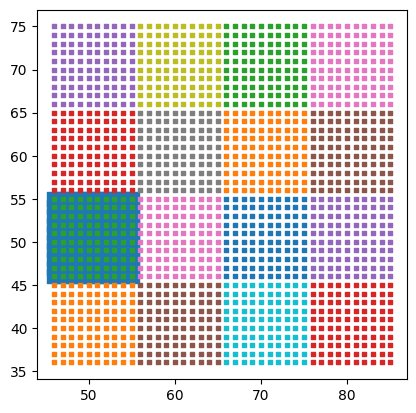

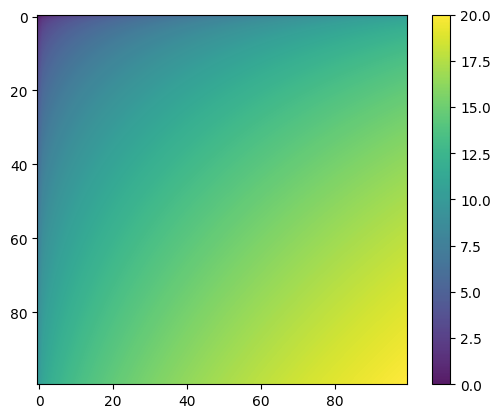

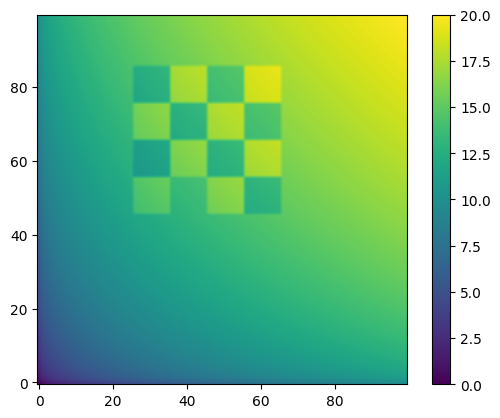

In [1]:
# This cell is the Pseudocode of how to mitigate the pattern in the individual images

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt #matplotlib.use('Agg')

# Use the circle from SNR calculations, turn it into a square...
radius = 5
diameter = 2*radius
location = (50, 50)
separation = 50
max_brightness = 10  #half_edge = np.sqrt(radius**2 + separation**2) - separation + radius

x_counter, y_counter = range(diameter), range(diameter)
coord_signalSquare = np.zeros(shape=(diameter**2, 2))
for i in range(diameter):
    for j in range(diameter): #print('i and j are:', i, j)
        coord_signalSquare[diameter*i + j] = (location[0] + radius - i, location[1] + radius - j)
fig, axes = plt.subplots()
plt.scatter(coord_signalSquare[:,0], coord_signalSquare[:,1], s=100, marker="s")
axes.set_aspect( 1 )

# make checkerboard from that (big) square
angular_squares, radial_squares = 4, 4
squares_tot = angular_squares*radial_squares
coord_signalExtendedSquares = np.array(np.zeros(shape=(diameter**2, 2, squares_tot))) # Points in small square, ####, number of small squares
#checkerboard_vectors = [[-1,0], [0,0], [1,0], [2,0], [-1,1], [0,1], [1,1], [2,1], [-1,2], [0,2], [1,2], [2,2], [-1,3], [0,3], [1,3], [2,3] ]    # Use a combinatorics method to get this for a general checkerboard pattern (from the above inputs), and use the set that's appropriate for the angular/radial (compoenent of the) observation
checkerboard_vectors = [[0,-1], [0,0], [0,1], [0,2], [1,-1], [1,0], [1,1], [1,2], [2,-1], [2,0], [2,1], [2,2], [3,-1], [3,0], [3,1], [3,2] ]    # Use a combinatorics method to get this for a general checkerboard pattern (from the above inputs), and use the set that's appropriate for the angular/radial (compoenent of the) observation
for i in range(squares_tot): # print(np.shape(coord_signalExtendedSquares))
    for j in range(angular_squares):
        for k in range(radial_squares):
            coord_signalExtendedSquares[:,:,i] = np.add(coord_signalSquare , np.multiply(checkerboard_vectors[i] , [diameter, diameter]))
    plt.scatter(coord_signalExtendedSquares[:,0,i], coord_signalExtendedSquares[:,1,i], s=10, marker="s")
plt.show()

# Add/subtract a fraction of the planet's signal square to each of the other squares

def function(x, y):
    z = np.zeros( ( len(x), len(y) ) )
    for i in range(len(x)):
        for j in range(len(y)):
            z[i][j] = np.sqrt(x[i]) + np.sqrt(y[j])
    return z
x, y = np.linspace(0,100,100), np.linspace(0,100,100)
z = function(x, y)
im = plt.imshow(z, cmap=plt.cm.viridis, alpha=0.9, interpolation='bilinear') #, extent=extent)
plt.colorbar()
plt.show()

def add_subtract_signal(signalImage, square_location, amount_changed):
    # where the large signal's x & y coordinates and the coordinates of an extended square are equal
    array_x = np.array([coord_signalExtendedSquares[:,0,0] ] ).T
    array_y = np.array([coord_signalExtendedSquares[:,1,0] ] ).T # Maybe change the 0 to something more general, even though all will have the same 10x10 shape
    coord_sqr = np.concatenate([array_x, array_y], axis=1) ###
    signalImage_changed = signalImage
    for i in coord_sqr: # for each of the [x,y] coordinates in the checkerboard at square_location
        signalImage_changed[int(i[0] + diameter*square_location[0]), int(i[1] + diameter*square_location[1])] = signalImage[int(i[0] + diameter*square_location[0]),int(i[1] + diameter*square_location[1])] + amount_changed ###
    return signalImage_changed

for i in checkerboard_vectors:
    if i == [0,0]:
        True
    elif (i[0] + i[1]) % 2 == 0: # subtract signal
        z = add_subtract_signal(z, i, -2)
    elif (i[0] + i[1]) % 2 != 0: # add signal      #or just "else"
        z = add_subtract_signal(z, i, 2)
im_changed = plt.imshow(z, origin='lower', cmap=plt.cm.viridis, interpolation='bilinear') #, extent=extent)  alpha=0.7,
plt.colorbar()
plt.show()
#z_new = z + z_change


# if the planet signal is 10, add 10*(1/2) to the squares next to it,
# subtract 10*(1/4) to the squares next to those


#This ends the FPI (post-master's) research code

# Begin coding notes below

In [ ]:
# Color spectra used for plots
clrs = ['brown', 'maroon', 'red', 'tomato', 'coral', 'darkorange', 'tan', 'orange', 'wheat', 'gold', 'darkkhaki', 'lightyellow', 'olive', 'yellow', 'yellowgreen', 'chartreuse', 'darkseagreen', 'lightgreen', 'forestgreen', 'lime', 'springgreen', 'aquamarine', 'lightseagreen', 'lightcyan', 'teal', 'darkcyan', 'cyan', 'skyblue', 'slategray', 'royalblue', 'navy', 'slateblue', 'blue', 'mediumpurple', 'blueviolet', 'indigo', 'darkviolet', 'thistle', 'plum', 'purple', 'magenta', 'deeppink', 'crimson', 'pink']
greens = ['#88ff6b', '#7bff5b', '#6aff45', '#58ff30', '#45ff18', '#32ff00', '#28cf00', '#21ac00', '#1c8f00', '#167000', '#0f5000', '#092d00', '#031200']

In [ ]:
# Plot the gradations of green colors
fig = plt.figure(figsize = (12, 4))
ax = fig.add_subplot(1, 1, 1)
a = np.empty(9)
for i in range(len(greens)):
    for j in range(len(a)):
        a[j] = i
    ax.plot(range(9), a, color=greens[i], label='$green_{'+str(i)+'}$')
handles, labels = ax.get_legend_handles_labels() # This line flips the order of the legend, so it aligns with the plot's colors ###
plt.legend(handles[::-1], labels[::-1], title='Shades of green', loc='upper right') # same as line above

In [ ]:
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolors
def plot_colortable(colors, sort_colors=True, emptycols=0):
    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12
    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors)
    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)
    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72
    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()
    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height
        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7
        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')
        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )
    return fig
xkcd_fig = plot_colortable(mcolors.XKCD_COLORS, "XKCD Colors")
#xkcd_fig.savefig("/home/dcpetit/Documents/XKCD_Colors.png")

## Code Appendix

In [ ]:
# The Code Appendix - Has been moved to a txt file on the BE laptop in the thesis folder
# called "Thesis_Code_Commented_Out_Appendix.txt"


'''
%matplotlib qt
from mpl_toolkits import mplot3d



%%capture
%config Completer.use_jedi = False
%config InlineBackend.figure_formats = ['svg']
# Install IPython on Google Colab?
import subprocess
import sys
from IPython import get_ipython
install_packages = "google.colab" in str(get_ipython())
if install_packages:
    for package in ["expertsystem", "graphviz"]:
        subprocess.check_call(
            [sys.executable, "-m", "pip", "install", package]
        )
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
plot_geeks = ax.scatter(x, y, z) # , color='green'
ax.set_title("3D plot"), ax.set_xlabel('x-axis'), ax.set_ylabel('y-axis'), ax.set_zlabel('z-axis')
plt.show()

'''